### Подготовка данных к анализу

In [1]:
import sys
import os

# Путь к корню проекта (на один уровень выше папки train_model)
project_root = os.path.abspath(os.path.join('..')) 
sys.path.append(project_root)

import pandas as pd

In [2]:
# Изменение количества отображаемых столбцов df
pd.set_option('display.max_columns', None)

In [3]:
def beautify_float(value):
  """Эта функция берет на вход вещественное число
  и преобразует его в строку вида 'целая часть.2 разряда дробной части'"""
  return "{:.2f}".format(value)

In [4]:
df = pd.read_csv('train_data/test_final.csv')
df.info()
sorted_df = df.sort_values(by=['game_id', 'min', 'plus_min'], ignore_index=True) # game_id
head_df = sorted_df.copy(deep=True)
head_df['left_avg_transfer_value'] = head_df['left_avg_transfer_value'].apply(beautify_float)
head_df['right_avg_transfer_value'] = head_df['right_avg_transfer_value'].apply(beautify_float)
head_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28110 entries, 0 to 28109
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   season_id                      28110 non-null  int64  
 1   game_id                        28110 non-null  int64  
 2   left_team_id                   28110 non-null  object 
 3   right_team_id                  28110 non-null  object 
 4   tour_number                    28110 non-null  int64  
 5   min                            28110 non-null  float64
 6   plus_min                       28110 non-null  float64
 7   left_coach_id                  27891 non-null  float64
 8   right_coach_id                 27929 non-null  float64
 9   referee_id                     28060 non-null  float64
 10  left_num_v                     28110 non-null  int64  
 11  left_num_z                     28110 non-null  int64  
 12  left_num_p                     28110 non-null 

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div
28105,5980,11061,7-fk-khimki,6-fk-rostov,27,70.0,0.0,2843.0,23660.0,3589.0,1,4,4,2,0,1,4,4,2,0,2,0,1,0,0,0,0,1,0,0,12350000.0,37325000.0,1122727.27,3393181.82,1,0,57.454545,53.090909,0.330877,3.022267
28106,5980,11061,7-fk-khimki,6-fk-rostov,27,77.0,0.0,2843.0,23660.0,3589.0,1,4,4,2,0,1,4,4,2,0,2,0,1,0,0,0,0,1,0,0,12350000.0,39625000.0,1122727.27,3602272.73,1,0,64.454545,53.090909,0.311672,3.208502
28107,5980,11061,7-fk-khimki,6-fk-rostov,27,84.0,0.0,2843.0,23660.0,3589.0,1,5,3,2,0,1,4,3,3,0,2,0,1,0,0,0,0,1,0,0,12450000.0,38775000.0,1131818.18,3525000.00,1,0,63.818182,52.454545,0.321083,3.114458
28108,5980,11061,7-fk-khimki,6-fk-rostov,27,89.0,0.0,2843.0,23660.0,3589.0,1,5,3,2,0,1,4,3,3,0,2,0,1,0,1,0,0,1,0,0,12450000.0,38775000.0,1131818.18,3525000.00,1,1,68.818182,57.454545,0.321083,3.114458
28109,5980,11061,7-fk-khimki,6-fk-rostov,27,90.0,2.0,2843.0,23660.0,3589.0,1,5,2,3,0,1,4,3,3,0,2,0,1,0,1,0,0,1,0,0,9550000.0,38775000.0,868181.82,3525000.00,1,1,61.636364,58.454545,0.246293,4.060209


#### Закодируем столбцы left_team_id и right_team_id

In [5]:
from sklearn.preprocessing import LabelEncoder

le_team = LabelEncoder()
left_unique_team_id = set(sorted_df['left_team_id'].unique())
right_unique_team_id = set(sorted_df['right_team_id'].unique())
unique_team_id = list(left_unique_team_id | right_unique_team_id)
le_team.fit_transform(unique_team_id)

sorted_df['left_team_id'] = le_team.transform(sorted_df['left_team_id'])
sorted_df['right_team_id'] = le_team.transform(sorted_df['right_team_id'])

sorted_df.head()

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div
0,1768,8927,15,11,1,0.0,0.0,158.0,7276.0,416.0,1,4,4,2,0,1,3,6,1,0,0,0,0,0,0,0,0,0,0,0,75000000.0,39800000.0,6.818182e+06,3.618182e+06,0,0,0.000000,0.0,1.884422,0.530667
1,1768,8927,15,11,1,36.0,0.0,158.0,7276.0,416.0,1,4,4,2,0,1,3,6,1,0,0,0,1,0,0,0,0,0,0,0,75000000.0,39800000.0,6.818182e+06,3.618182e+06,0,0,36.000000,36.0,1.884422,0.530667
2,1768,8927,15,11,1,51.0,0.0,158.0,7276.0,416.0,1,4,4,2,0,1,3,6,1,0,0,0,2,0,0,0,0,0,0,0,75000000.0,39800000.0,6.818182e+06,3.618182e+06,0,0,51.000000,51.0,1.884422,0.530667
3,1768,8927,15,11,1,59.0,0.0,158.0,7276.0,416.0,1,4,4,2,0,1,3,6,1,0,0,0,2,0,0,0,0,0,0,0,100000000.0,39800000.0,9.090909e+06,3.618182e+06,0,0,53.636364,59.0,2.512563,0.398000
4,1768,8927,15,11,1,63.0,0.0,158.0,7276.0,416.0,1,4,5,1,0,1,3,6,1,0,0,0,2,0,0,0,0,0,0,0,102000000.0,39800000.0,9.272727e+06,3.618182e+06,0,0,51.909091,63.0,2.562814,0.390196


In [6]:
encoding_dict = {cls: idx for idx, cls in enumerate(le_team.classes_)}
encoding_dict

{np.str_('1-fk-spartak'): 0,
 np.str_('1069-rotor'): 1,
 np.str_('11-amkar'): 2,
 np.str_('1149-fk-torpedo-m'): 3,
 np.str_('12-tom'): 4,
 np.str_('1325-fk-baltika'): 5,
 np.str_('14-fk-krylja-sovetov'): 6,
 np.str_('16-rubin'): 7,
 np.str_('2-pfk-cska'): 8,
 np.str_('20012-fk-tosno'): 9,
 np.str_('29889-akron'): 10,
 np.str_('3-fk-lokomotiv'): 11,
 np.str_('3319-dinamo-spb'): 12,
 np.str_('34061-dinamo-mahachkala'): 13,
 np.str_('4-fk-dinamo-moskva'): 14,
 np.str_('5-fk-zenit'): 15,
 np.str_('5167-fk-fakel'): 16,
 np.str_('55-terek'): 17,
 np.str_('5818-gazovik'): 18,
 np.str_('6-fk-rostov'): 19,
 np.str_('6060-fk-enisej'): 20,
 np.str_('6707-fk-ufa'): 21,
 np.str_('7-fk-khimki'): 22,
 np.str_('741-fk-ural'): 23,
 np.str_('8693-arsenal-tula'): 24,
 np.str_('873-ska-jenergija'): 25,
 np.str_('880-fk-nizhnij-novgorod'): 26,
 np.str_('885-krasnodar'): 27,
 np.str_('9165-spartak-tambov'): 28,
 np.str_('917-anzhi'): 29}

#### Добавим столбец факторный признак res_event - отражающий исход матча в пределах события и целевой признак res - отражающий исход матча вцелом:
- 0 - ничья
- 1 - победа левой команды
- 2 - победа правой команды

In [7]:
def calculate_res_event(l_score: int, r_score: int) -> int:
    if l_score > r_score: return 1
    elif l_score < r_score: return 2
    else: return 0
    
def calculate_res(game_id: int) -> int:
    l_score = sorted_df.loc[sorted_df['game_id']==game_id]['left_goal_score'].max()
    r_score = sorted_df.loc[sorted_df['game_id']==game_id]['right_goal_score'].max()
    return calculate_res_event(l_score, r_score)

sorted_df['res_event'] = sorted_df.apply(
    lambda row: calculate_res_event(row['left_goal_score'], row['right_goal_score']),
    axis=1)

sorted_df['res'] = sorted_df.apply(
    lambda row: calculate_res(row['game_id']),
    axis=1
)

sorted_df.tail()

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res
28105,5980,11061,22,19,27,70.0,0.0,2843.0,23660.0,3589.0,1,4,4,2,0,1,4,4,2,0,2,0,1,0,0,0,0,1,0,0,12350000.0,37325000.0,1.122727e+06,3.393182e+06,1,0,57.454545,53.090909,0.330877,3.022267,1,0
28106,5980,11061,22,19,27,77.0,0.0,2843.0,23660.0,3589.0,1,4,4,2,0,1,4,4,2,0,2,0,1,0,0,0,0,1,0,0,12350000.0,39625000.0,1.122727e+06,3.602273e+06,1,0,64.454545,53.090909,0.311672,3.208502,1,0
28107,5980,11061,22,19,27,84.0,0.0,2843.0,23660.0,3589.0,1,5,3,2,0,1,4,3,3,0,2,0,1,0,0,0,0,1,0,0,12450000.0,38775000.0,1.131818e+06,3.525000e+06,1,0,63.818182,52.454545,0.321083,3.114458,1,0
28108,5980,11061,22,19,27,89.0,0.0,2843.0,23660.0,3589.0,1,5,3,2,0,1,4,3,3,0,2,0,1,0,1,0,0,1,0,0,12450000.0,38775000.0,1.131818e+06,3.525000e+06,1,1,68.818182,57.454545,0.321083,3.114458,0,0
28109,5980,11061,22,19,27,90.0,2.0,2843.0,23660.0,3589.0,1,5,2,3,0,1,4,3,3,0,2,0,1,0,1,0,0,1,0,0,9550000.0,38775000.0,8.681818e+05,3.525000e+06,1,1,61.636364,58.454545,0.246293,4.060209,0,0


#### Пропуски в данных к общему количеству записей

In [8]:
missing_ratio = (sorted_df.isna().sum() / len(sorted_df)).loc[lambda x: x > 0]
missing_ratio

left_coach_id                    0.007791
right_coach_id                   0.006439
referee_id                       0.001779
left_avg_transfer_value          0.000213
right_avg_transfer_value         0.000213
left_avg_time_player_in_game     0.000213
right_avg_time_player_in_game    0.000213
left_right_transfer_value_div    0.000213
right_left_transfer_value_div    0.000213
dtype: float64

In [9]:
missing_counts = sorted_df.isna().sum().loc[lambda x: x > 0]
missing_counts

left_coach_id                    219
right_coach_id                   181
referee_id                        50
left_avg_transfer_value            6
right_avg_transfer_value           6
left_avg_time_player_in_game       6
right_avg_time_player_in_game      6
left_right_transfer_value_div      6
right_left_transfer_value_div      6
dtype: int64

In [10]:
sorted_df.loc[pd.isna(sorted_df['left_avg_transfer_value'])]

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res
11169,2973,9832,18,27,24,0.0,0.0,4627.0,11950.0,725.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
11294,2973,9841,18,23,25,0.0,0.0,4627.0,4619.0,2869.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
11815,2973,9876,28,12,29,0.0,0.0,5755.0,959.0,586.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
11921,2973,9884,6,12,30,0.0,0.0,2839.0,959.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
12700,3953,9939,1,27,7,0.0,0.0,3294.0,11950.0,542.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0
12768,3953,9945,19,1,8,0.0,0.0,1578.0,3294.0,726.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,0,0,NaN,NaN,NaN,NaN,0,0


In [11]:
# id записей в наборе данных содержащие пропуски по одному из столбцов
missing_rows_id = set(sorted_df['game_id'].loc[
    (pd.isna(sorted_df['left_coach_id'])) |
    (pd.isna(sorted_df['right_coach_id'])) |
    (pd.isna(sorted_df['referee_id'])) |
    (pd.isna(sorted_df['left_avg_transfer_value'])) |
    (pd.isna(sorted_df['right_avg_transfer_value'])) |
    (pd.isna(sorted_df['left_avg_time_player_in_game'])) |
    (pd.isna(sorted_df['right_avg_time_player_in_game'])) |
    (pd.isna(sorted_df['left_right_transfer_value_div'])) |
    (pd.isna(sorted_df['right_left_transfer_value_div']))
    ])
missing_rows_id

{9666,
 9691,
 9692,
 9747,
 9832,
 9841,
 9876,
 9884,
 9939,
 9945,
 10278,
 10287,
 10295,
 10305,
 10367,
 10375,
 10385,
 10394,
 10401,
 10413,
 10419,
 10429,
 10437,
 10442,
 10451,
 10456,
 10469,
 10478,
 10486,
 10489,
 10498,
 10505,
 10516,
 10526,
 10530,
 10541,
 10569,
 10582,
 10583,
 10599}

In [12]:
for i in missing_rows_id:
    drop_index_game = sorted_df[sorted_df['game_id'] == i].index
    sorted_df.drop(drop_index_game, inplace=True)

In [13]:
missing_ratio = (sorted_df.isna().sum() / len(sorted_df)).loc[lambda x: x > 0]
missing_ratio

Series([], dtype: float64)

### Предварительный анализ данных

In [14]:
import matplotlib.pyplot as plt

#### График - Статистика по тренерам (20 тренеров с наибольшим количеством игр и процентом побед)

In [15]:
# тренера и их количество побед и поражений

coach_win_lose_draw_df = sorted_df.drop_duplicates(subset=['game_id'])

# инициализация
coach_win_dict: dict[int, int] = {}
coach_lose_dict: dict[int, int] = {}
coach_draw_dict: dict[int, int] = {}

for _, row in coach_win_lose_draw_df.iterrows():
    if row['res'] == 0:
        coach_draw_dict[row['left_coach_id']] = coach_draw_dict.setdefault(row['left_coach_id'], 0) + 1
        coach_draw_dict[row['right_coach_id']] = coach_draw_dict.setdefault(row['right_coach_id'], 0) + 1
        
    if row['res'] == 1:
        coach_win_dict[row['left_coach_id']] = coach_win_dict.setdefault(row['left_coach_id'], 0) + 1
        coach_lose_dict[row['right_coach_id']] = coach_lose_dict.setdefault(row['right_coach_id'], 0) + 1
        
    if row['res'] == 2:
        coach_lose_dict[row['left_coach_id']] = coach_lose_dict.setdefault(row['left_coach_id'], 0) + 1
        coach_win_dict[row['right_coach_id']] = coach_win_dict.setdefault(row['right_coach_id'], 0) + 1
        

coach_draw_df = pd.DataFrame(coach_draw_dict.items(), columns=['coach_id', 'Ничья'])
coach_lose_df = pd.DataFrame(coach_lose_dict.items(), columns=['coach_id', 'Поражение'])
coach_win_df = pd.DataFrame(coach_win_dict.items(), columns=['coach_id', 'Победа'])

coach_stats_df = coach_win_df.merge(coach_lose_df, on='coach_id', how='outer').merge(coach_draw_df, on='coach_id', how='outer').fillna(0)
coach_stats_df['game_count'] = coach_stats_df['Победа'] + coach_stats_df['Поражение'] + coach_stats_df['Ничья']
coach_stats_df['win_p'] = coach_stats_df['Победа'] / coach_stats_df['game_count']

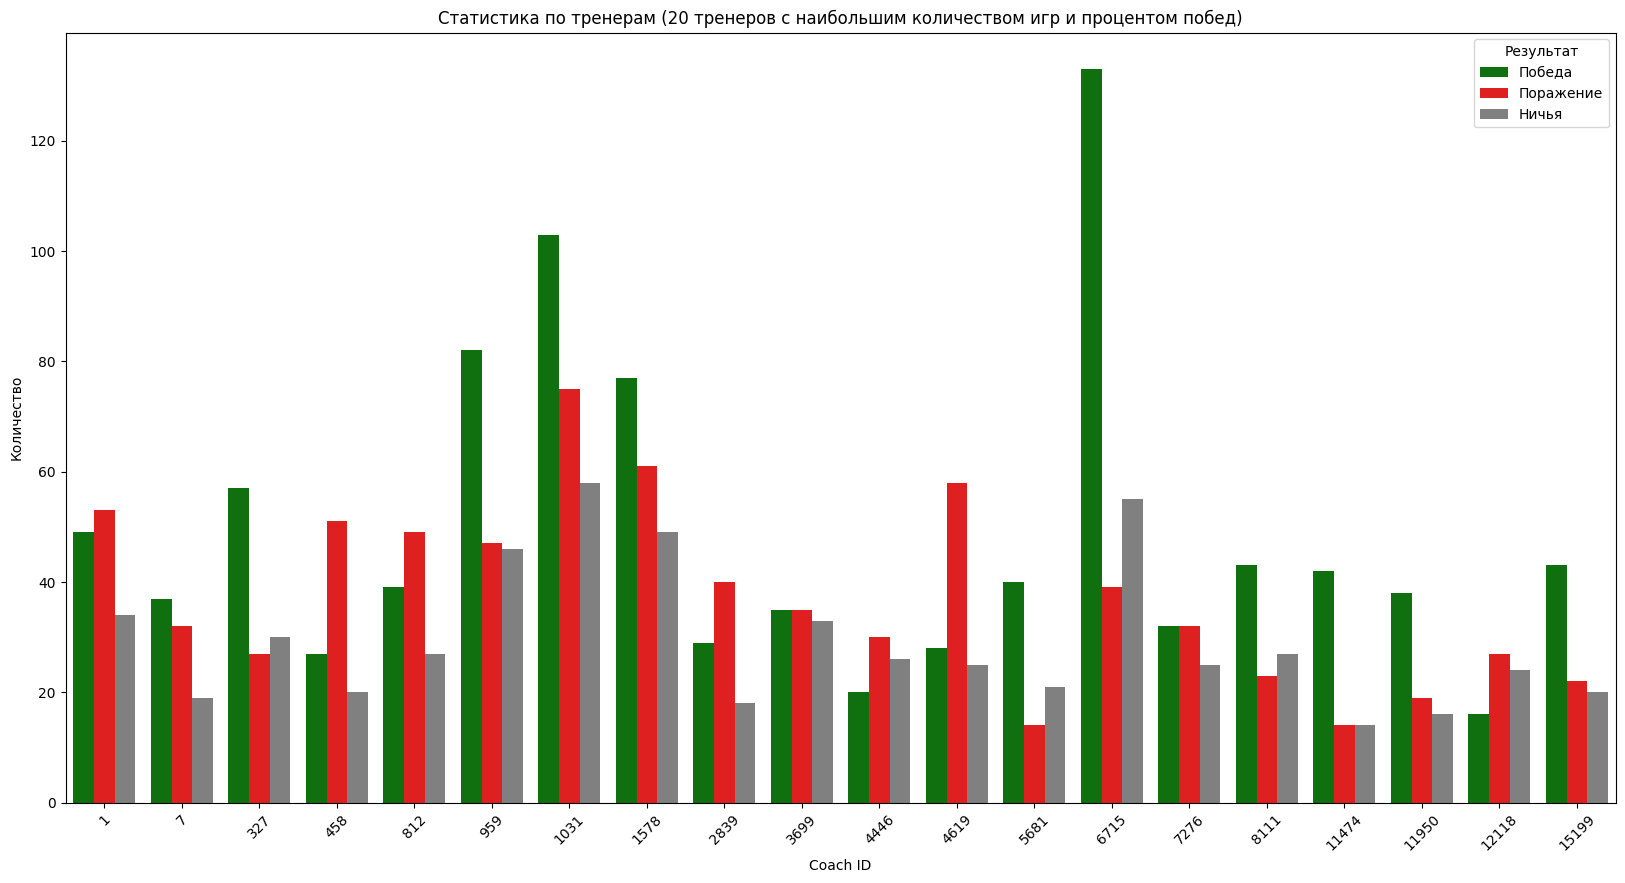

In [16]:
import seaborn as sns

# Сортируем тренеров по проценту побед и количеству игр
top_coaches = coach_stats_df.sort_values(['game_count', 'win_p'], ascending=False).head(20)
top_coaches['coach_id'] = top_coaches['coach_id'].astype(int)

# Подготовка данных
coach_stats_df_melted = pd.melt(
    top_coaches,
    id_vars='coach_id',
    value_vars=['Победа', 'Поражение', 'Ничья'],
    var_name='result',
    value_name='count'
)

# Построение сгруппированного графика
plt.figure(figsize=(20, 10))
sns.barplot(
    data=coach_stats_df_melted,
    x='coach_id',
    y='count',
    hue='result',
    palette={'Победа': 'green', 'Поражение': 'red', 'Ничья': 'gray'}
)
plt.title('Статистика по тренерам (20 тренеров с наибольшим количеством игр и процентом побед)')
plt.xlabel('Coach ID')
plt.ylabel('Количество')
plt.legend(title='Результат')
plt.xticks(rotation=45)
plt.show()

#### График - Распределение схем по количеству игр

In [17]:
# количество игр с различными схемами игроков на поле
left_count_lineup_df = sorted_df.drop_duplicates(subset=['game_id', 'left_num_v', 'left_num_z', 'left_num_p', 'left_num_n'])
right_count_lineup_df = sorted_df.drop_duplicates(subset=['game_id', 'right_num_v', 'right_num_z', 'right_num_p', 'right_num_n'])

count_lineup_dict: dict[str, int] = {}

for _, row in left_count_lineup_df.iterrows():
    left_lineup_str = f'{int(row['left_num_v'])}-{int(row['left_num_z'])}-{int(row['left_num_p'])}-{int(row['left_num_n'])}'
    
    count_lineup_dict[left_lineup_str] = count_lineup_dict.setdefault(left_lineup_str, 0) + 1
    
for _, row in right_count_lineup_df.iterrows():
    right_lineup_str = f'{int(row['right_num_v'])}-{int(row['right_num_z'])}-{int(row['right_num_p'])}-{int(row['right_num_n'])}'
    
    count_lineup_dict[right_lineup_str] = count_lineup_dict.setdefault(right_lineup_str, 0) + 1
    
lineup_stats_df = pd.DataFrame(count_lineup_dict.items(), columns=['lineup', 'count'])

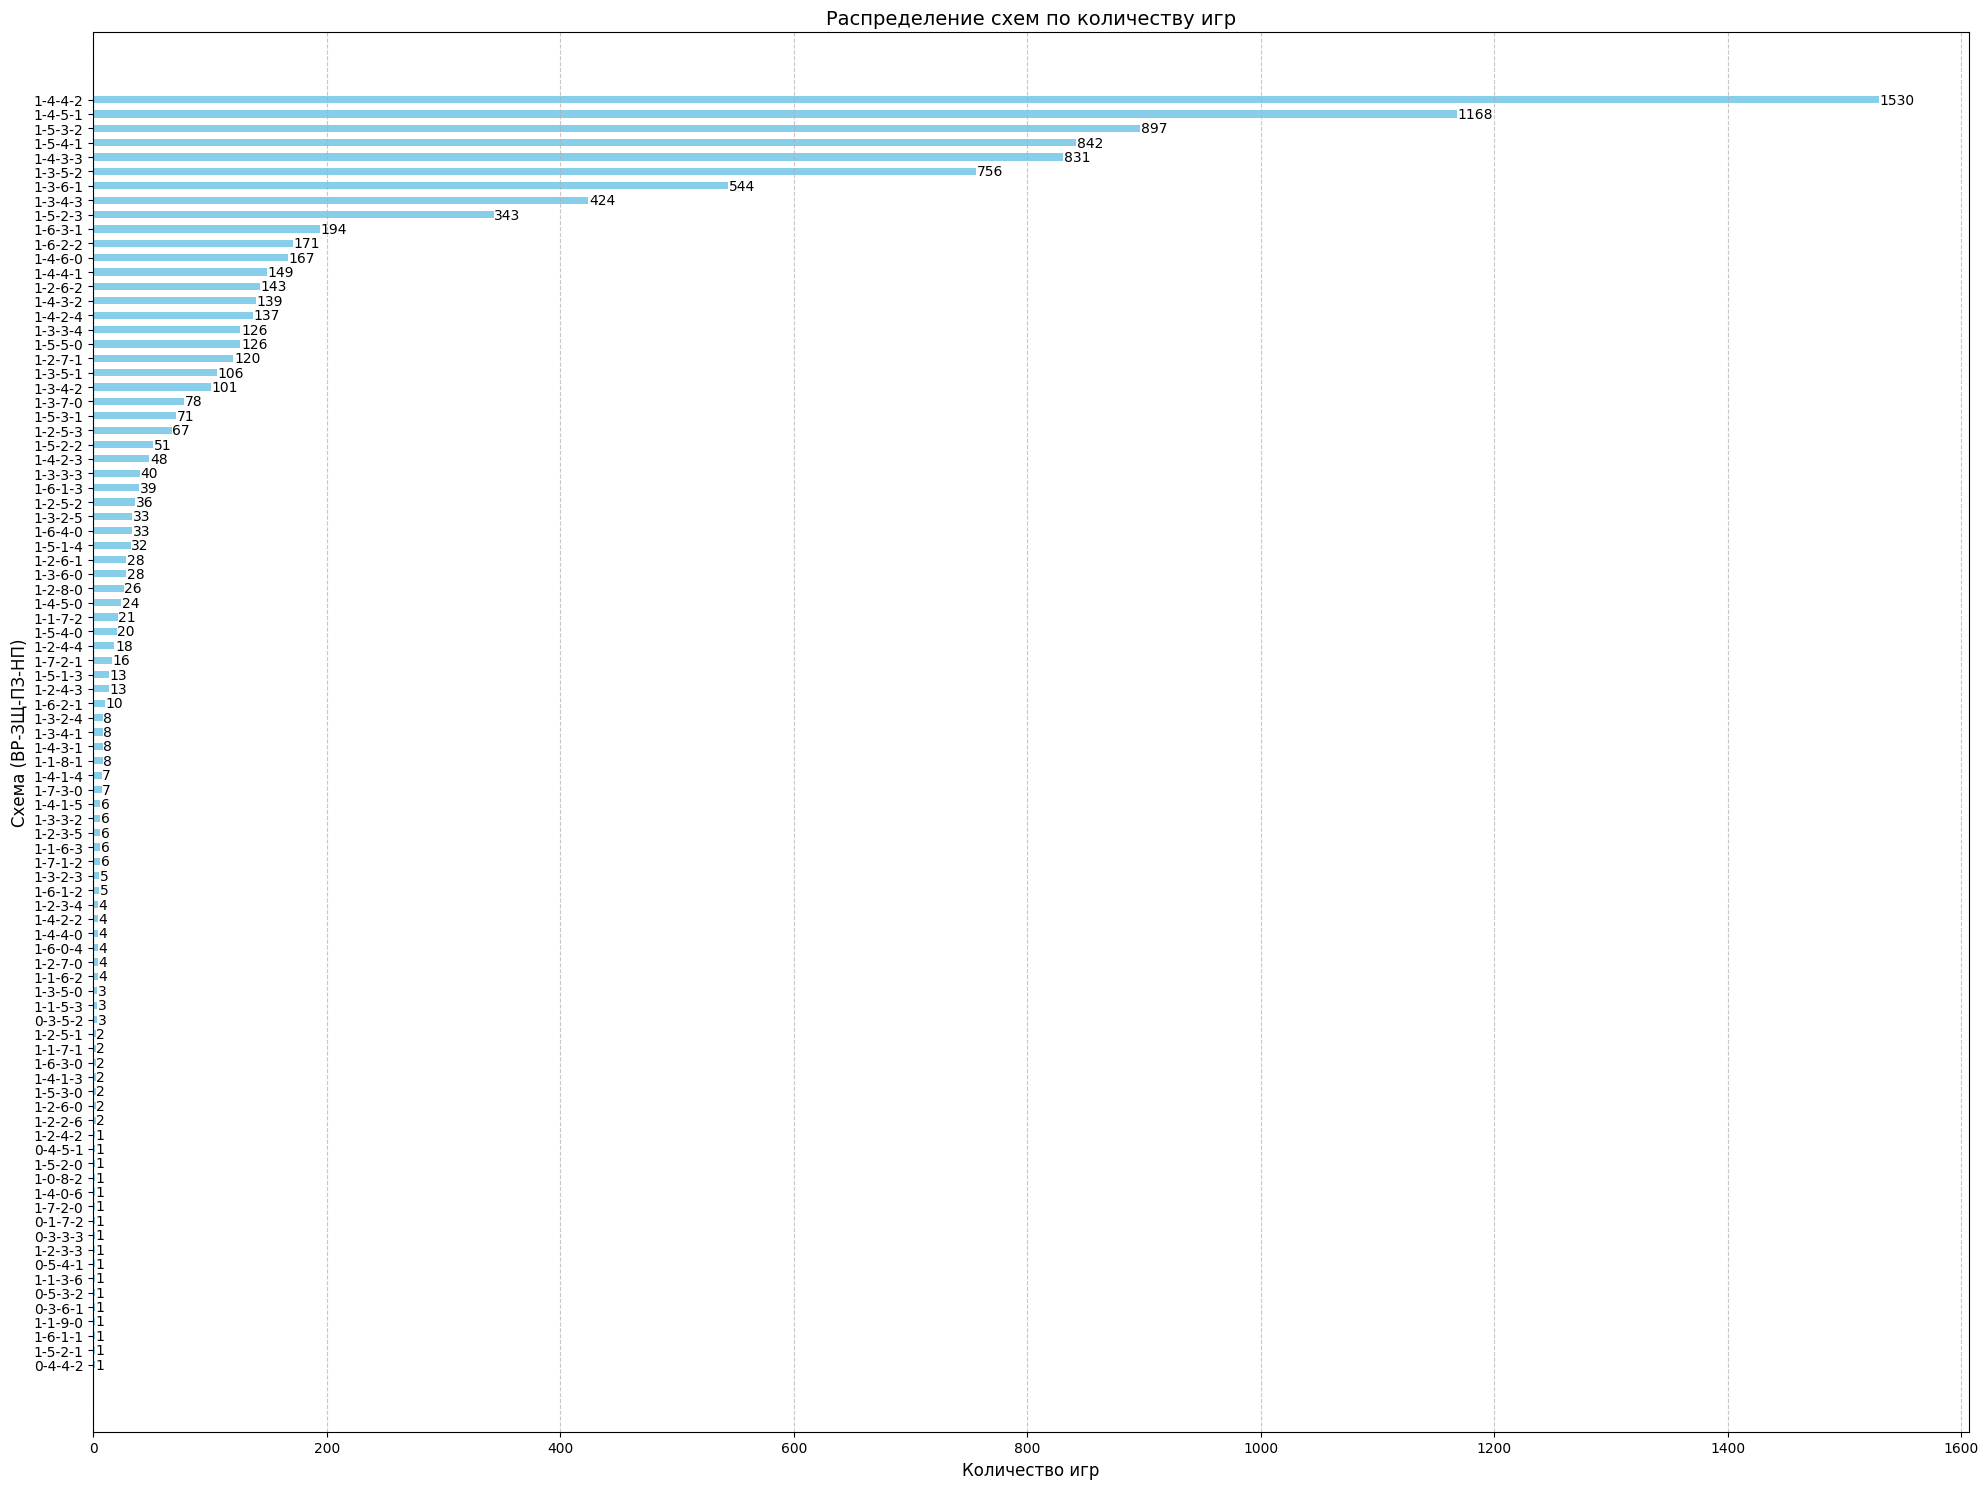

In [18]:
# Сортировка данных по количеству
lineup_stats_sorted = lineup_stats_df.sort_values('count', ascending=True)

# Создание графика
plt.figure(figsize=(20, 15))
bars = plt.barh(
    lineup_stats_sorted['lineup'],
    lineup_stats_sorted['count'],
    color='skyblue',
    height=0.5
)

# Настройка оформления
plt.title('Распределение схем по количеству игр', fontsize=14)
plt.xlabel('Количество игр', fontsize=12)
plt.ylabel('Схема (ВР-ЗЩ-ПЗ-НП)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Добавление значений на столбцы
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.5,
        bar.get_y() + bar.get_height()/2,
        f'{int(width)}',
        va='center',
        ha='left',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [19]:
# красная карточка вратарю на 8 минуте матча https://www.championat.com/football/_russiapl/tournament/1768/match/567548/#stats

sorted_df.loc[((sorted_df['right_num_v']==0) & (sorted_df['right_num_z']==4) & (sorted_df['right_num_p']==4) & (sorted_df['right_num_n']==2)) |
              ((sorted_df['left_num_v']==0) & (sorted_df['left_num_z']==4) & (sorted_df['left_num_p']==4) & (sorted_df['left_num_n']==2))
              ].head()

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res
1140,1768,9024,21,7,13,8.0,0.0,1031.0,3933.0,19.0,0,4,4,2,0,1,4,3,3,0,0,1,0,0,0,0,0,0,0,0,8900000.0,41500000.0,890000.0,3.772727e+06,0,0,8.0,8.0,0.214458,4.662921,0,2


In [20]:
sorted_df.describe().applymap(beautify_float)

c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\backend\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\vlaxd\AppData\Local\Temp\ipykernel_85352\3116729034.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sorted_df.describe().applymap(beautify_float)


,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res
count,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00
mean,3837.35,10013.88,15.20,15.12,15.40,56.80,0.25,5579.49,5579.69,1448.27,1.00,3.97,4.13,1.85,0.00,1.00,4.00,4.16,1.77,0.00,1.21,0.06,1.40,0.08,0.61,0.07,0.02,0.76,0.11,0.03,29048438.18,28068068.05,2653846.02,2567586.39,0.90,0.71,48.20,48.05,inf,2.18,0.88,1.06
std,1385.78,604.92,8.03,8.03,8.58,27.49,0.99,5742.21,5797.88,2586.33,0.01,0.90,1.21,0.91,0.00,0.01,0.93,1.21,0.90,0.00,1.22,0.24,1.31,0.28,0.85,0.27,0.13,0.97,0.34,0.16,26151377.01,24911436.49,2385340.44,2273737.01,1.04,0.90,21.44,21.42,nan,3.38,0.79,0.74
min,1768.00,8927.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,925000.00,0.00,84090.91,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
25%,2599.00,9506.00,8.00,8.00,8.00,40.00,0.00,812.00,812.00,398.00,1.00,3.00,3.00,1.00,0.00,1.00,3.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9500000.00,9255000.00,872727.27,845454.55,0.00,0.00,39.00,38.18,0.38,0.36,0.00,1.00
50%,3953.00,10020.00,15.00,15.00,15.00,64.00,0.00,3699.00,3699.00,707.00,1.00,4.00,4.00,2.00,0.00,1.00,4.00,4.00,2.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16400000.00,16100000.00,1500000.00,1472727.27,1.00,0.00,54.82,54.45,1.04,0.96,1.00,1.00
75%,4987.00,10531.00,22.00,22.00,23.00,79.00,0.00,9133.00,9133.00,1137.00,1.00,5.00,5.00,2.00,0.00,1.00,5.00,5.00,2.00,0.00,2.00,0.00,2.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,45500000.00,44600000.00,4172727.27,4090454.55,1.00,1.00,63.64,63.27,2.78,2.61,2.00,2.00
max,5980.00,11061.00,29.00,29.00,30.00,90.00,16.00,23660.00,23660.00,15584.00,1.00,7.00,9.00,6.00,0.00,1.00,7.00,8.00,6.00,0.00,9.00,2.00,8.00,3.00,7.00,3.00,1.00,9.00,3.00,1.00,150600000.00,145800000.00,13690909.09,13254545.45,10.00,7.00,90.00,90.00,inf,84.50,2.00,2.00


Заменим значения inf в столбцах left_right_transfer_value_div и right_left_transfer_value_div на максимальное значение int

In [21]:
import numpy as np

sorted_df = sorted_df.replace([-np.inf, np.inf], [-9999, 9999])

In [22]:
sorted_df.describe().applymap(beautify_float)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_85352\3116729034.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sorted_df.describe().applymap(beautify_float)


,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res
count,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00,27655.00
mean,3837.35,10013.88,15.20,15.12,15.40,56.80,0.25,5579.49,5579.69,1448.27,1.00,3.97,4.13,1.85,0.00,1.00,4.00,4.16,1.77,0.00,1.21,0.06,1.40,0.08,0.61,0.07,0.02,0.76,0.11,0.03,29048438.18,28068068.05,2653846.02,2567586.39,0.90,0.71,48.20,48.05,10.93,2.18,0.88,1.06
std,1385.78,604.92,8.03,8.03,8.58,27.49,0.99,5742.21,5797.88,2586.33,0.01,0.90,1.21,0.91,0.00,0.01,0.93,1.21,0.90,0.00,1.22,0.24,1.31,0.28,0.85,0.27,0.13,0.97,0.34,0.16,26151377.01,24911436.49,2385340.44,2273737.01,1.04,0.90,21.44,21.42,294.39,3.38,0.79,0.74
min,1768.00,8927.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,3.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,925000.00,0.00,84090.91,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00
25%,2599.00,9506.00,8.00,8.00,8.00,40.00,0.00,812.00,812.00,398.00,1.00,3.00,3.00,1.00,0.00,1.00,3.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9500000.00,9255000.00,872727.27,845454.55,0.00,0.00,39.00,38.18,0.38,0.36,0.00,1.00
50%,3953.00,10020.00,15.00,15.00,15.00,64.00,0.00,3699.00,3699.00,707.00,1.00,4.00,4.00,2.00,0.00,1.00,4.00,4.00,2.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16400000.00,16100000.00,1500000.00,1472727.27,1.00,0.00,54.82,54.45,1.04,0.96,1.00,1.00
75%,4987.00,10531.00,22.00,22.00,23.00,79.00,0.00,9133.00,9133.00,1137.00,1.00,5.00,5.00,2.00,0.00,1.00,5.00,5.00,2.00,0.00,2.00,0.00,2.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,45500000.00,44600000.00,4172727.27,4090454.55,1.00,1.00,63.64,63.27,2.78,2.61,2.00,2.00
max,5980.00,11061.00,29.00,29.00,30.00,90.00,16.00,23660.00,23660.00,15584.00,1.00,7.00,9.00,6.00,0.00,1.00,7.00,8.00,6.00,0.00,9.00,2.00,8.00,3.00,7.00,3.00,1.00,9.00,3.00,1.00,150600000.00,145800000.00,13690909.09,13254545.45,10.00,7.00,90.00,90.00,9999.00,84.50,2.00,2.00


#### График - Анализ выбросов значений в числоавых атрибутах

In [23]:
num_columns = [ 
    'left_num_v', 
    'left_num_z', 
    'left_num_p', 
    'left_num_n', 
    'left_num_u', 
    'right_num_v', 
    'right_num_z', 
    'right_num_p', 
    'right_num_n', 
    'right_num_u',
    'left_num_y',
    'left_num_y2r',
    'right_num_y',
    'right_num_y2r',
    'right_num_goal_g',
    'right_num_goal_p',
    'right_num_goal_a',
    'left_num_goal_g',
    'left_num_goal_p',
    'left_num_goal_a',
    'left_total_transfer_value',
    'right_total_transfer_value',
    'left_avg_time_player_in_game',
    'right_avg_time_player_in_game'
    ]

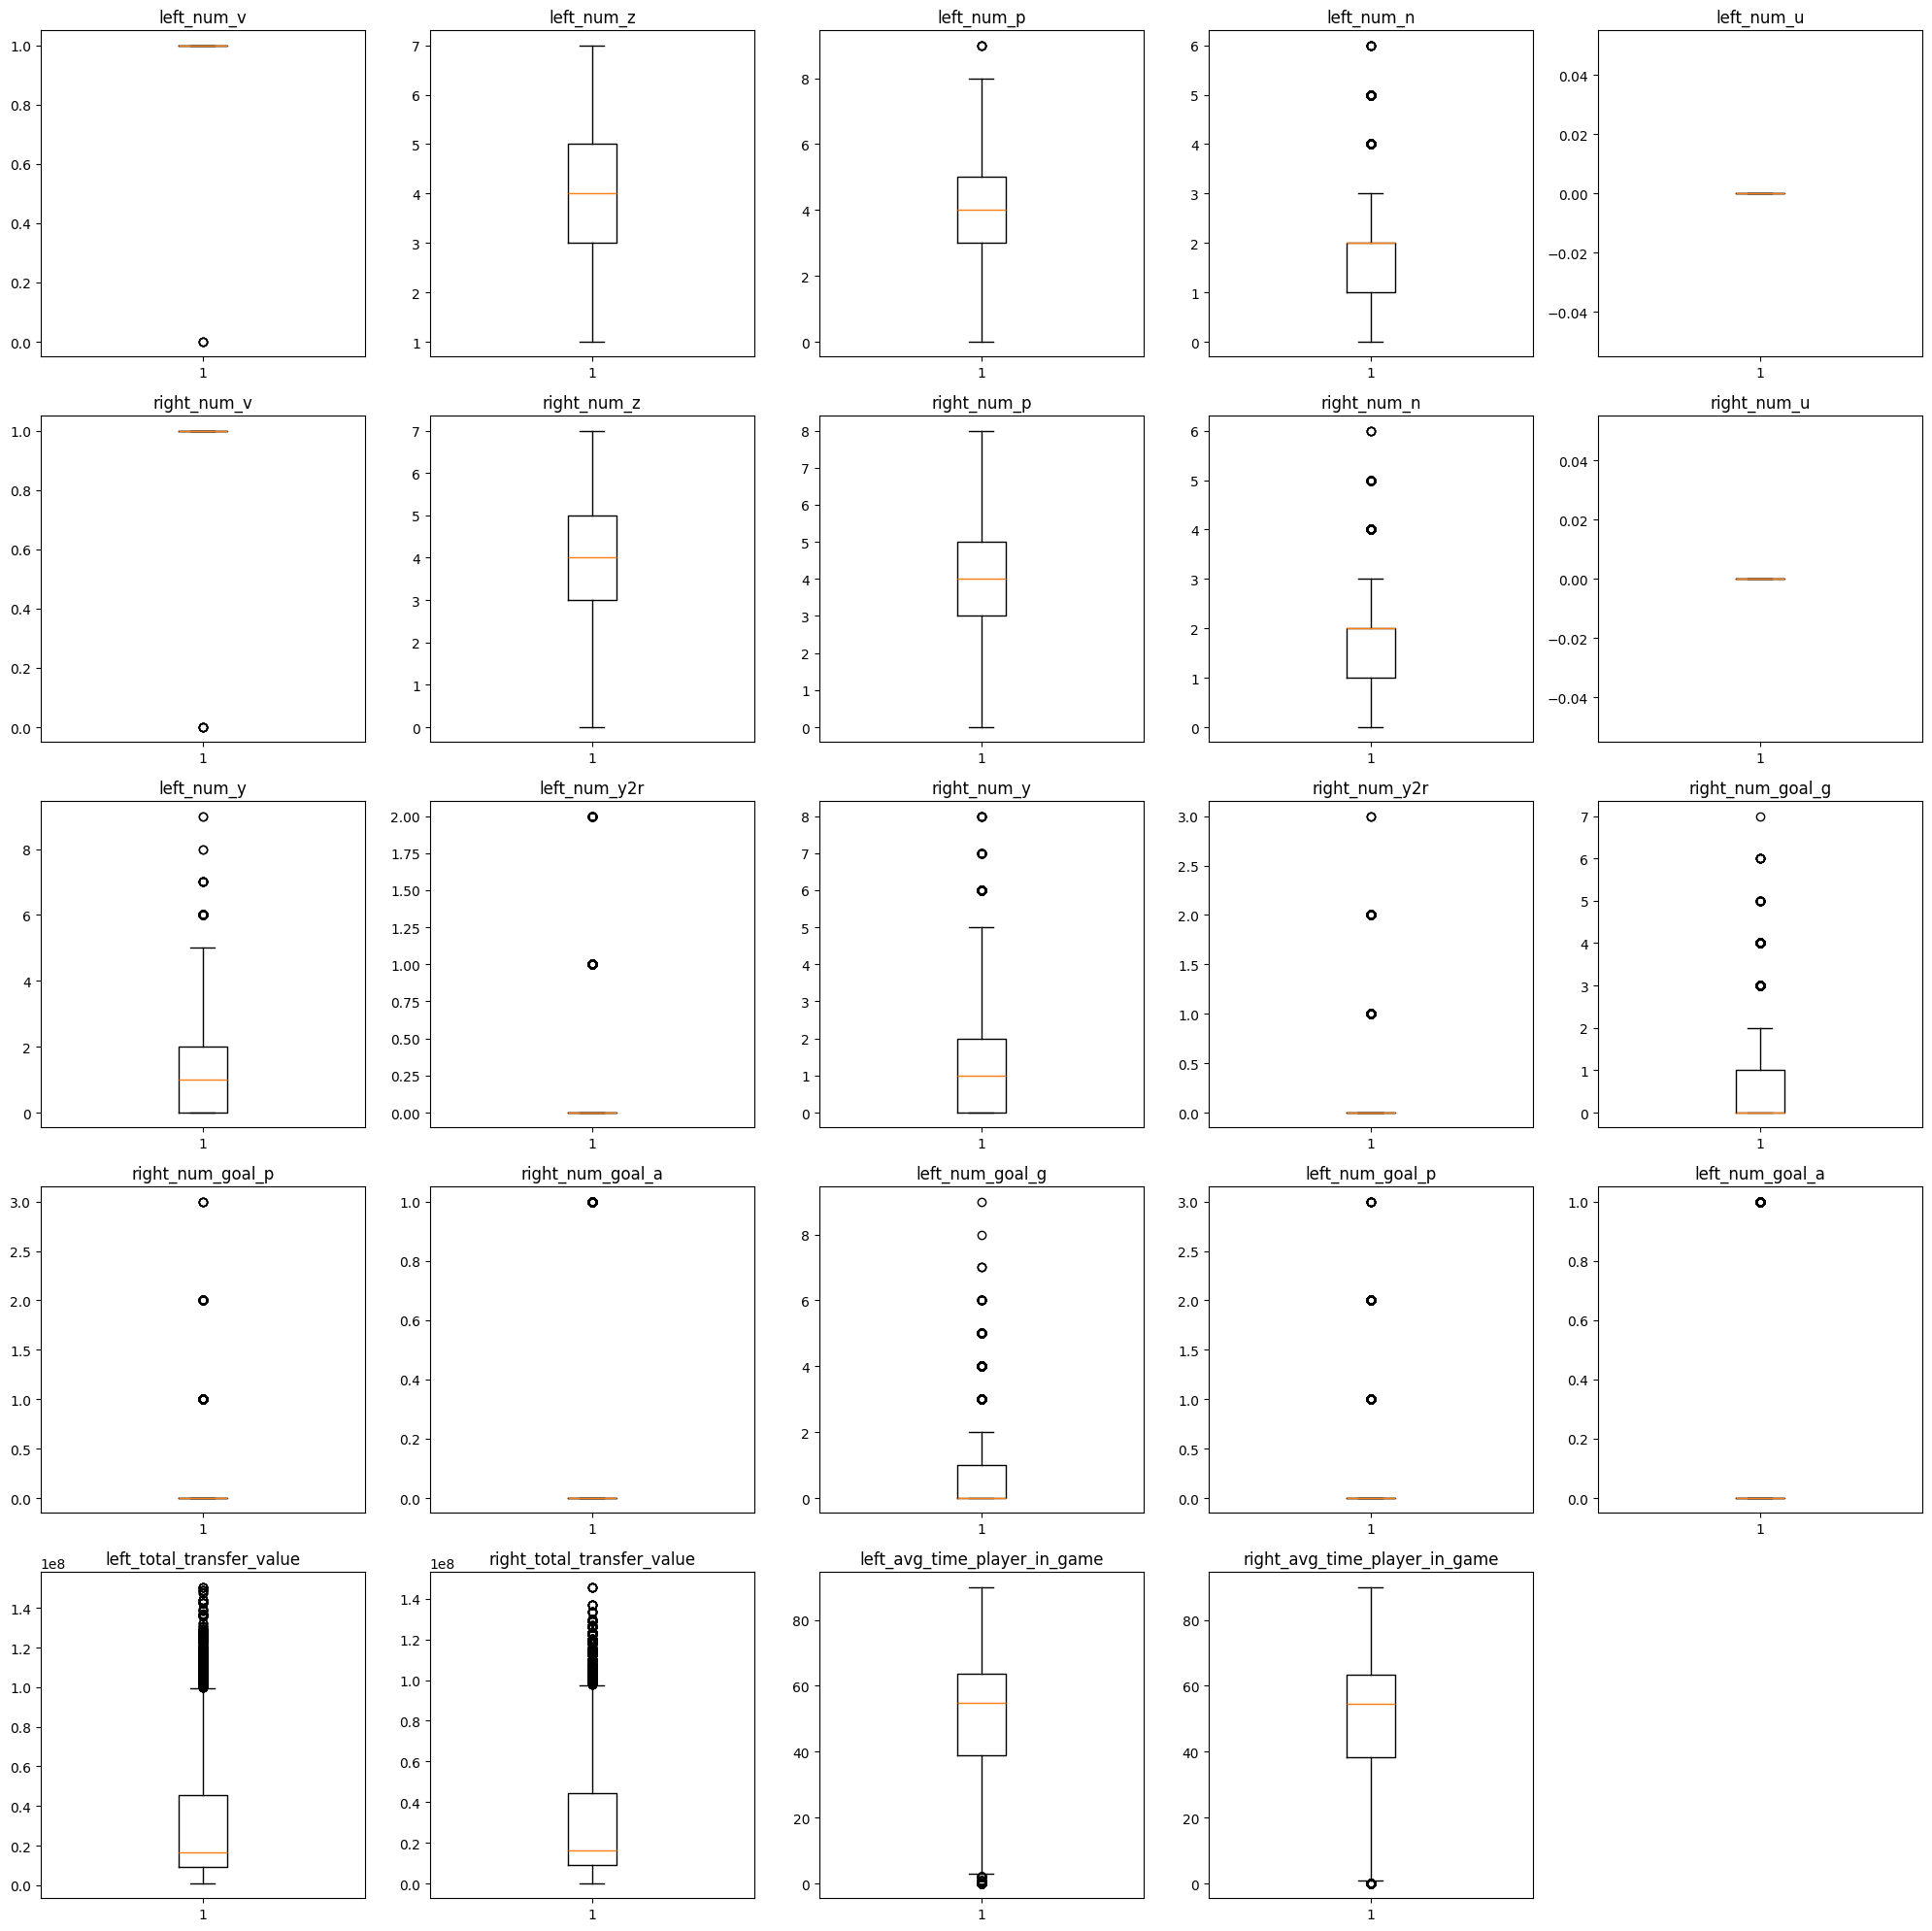

In [24]:
plt.rcParams["figure.figsize"] = 20, 20  # ширина, высота

i = 1
for col in sorted_df[num_columns]:
  plt.subplot(5, 5, i)
  plt.boxplot(sorted_df[col])
  plt.title(col)
  i += 1

plt.tight_layout()

#### График - Анализ распределения значений всех атрибутов

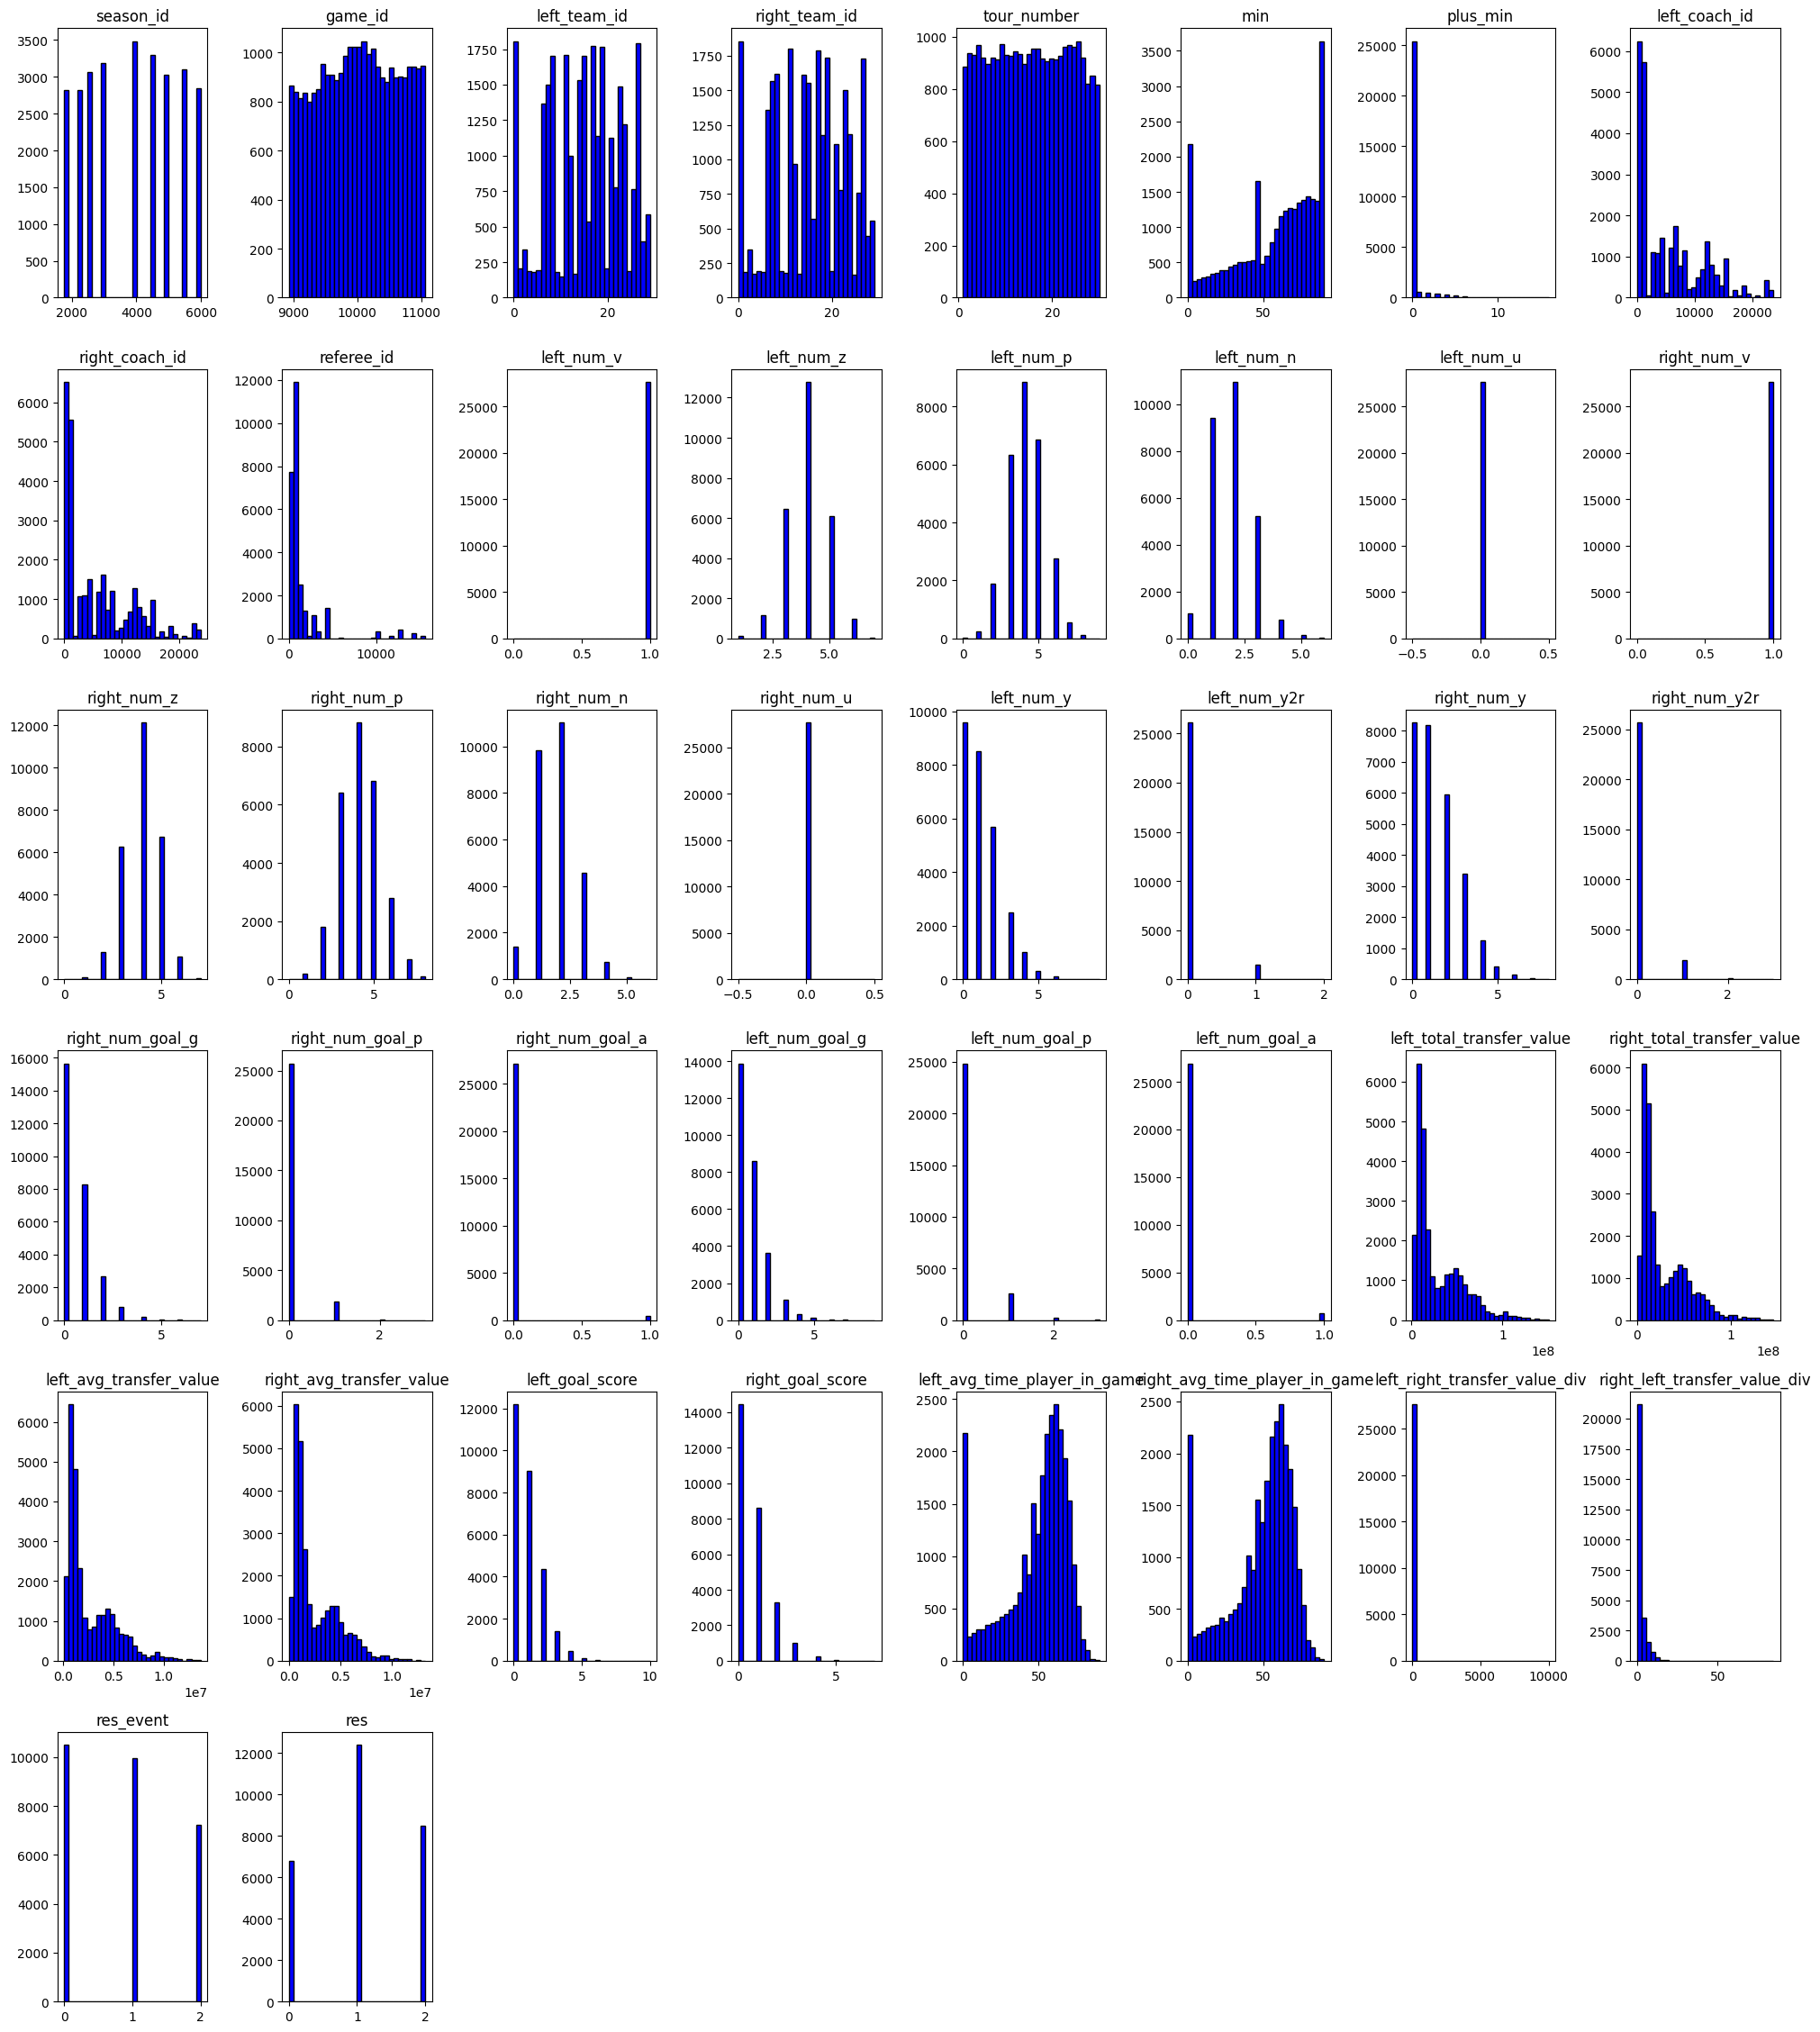

In [25]:
plt.rcParams["figure.figsize"] = 20, 30  # ширина, высота

i = 1
for col in sorted_df.columns[:]:
  plt.subplot(8, 8, i)
  plt.hist(sorted_df[col], bins=30, color="blue", linewidth=1, edgecolor="black")
  plt.title(col)
  i += 1

plt.tight_layout()

#### Тест по критерию Шапиро-Уилка

In [26]:
import scipy.stats as stats

for col in sorted_df[num_columns]:
  # выполним тест Шапиро-Уилка для всех нечисловых колонок
  stat, pval = stats.shapiro(sorted_df[col])
  print(f"{col}: Shapiro-Wilk statistic = {stat:.4f}, p-value = {pval:.4f}")

left_num_v: Shapiro-Wilk statistic = 0.0022, p-value = 0.0000
left_num_z: Shapiro-Wilk statistic = 0.8962, p-value = 0.0000
left_num_p: Shapiro-Wilk statistic = 0.9421, p-value = 0.0000
left_num_n: Shapiro-Wilk statistic = 0.8854, p-value = 0.0000
left_num_u: Shapiro-Wilk statistic = 1.0000, p-value = 1.0000
right_num_v: Shapiro-Wilk statistic = 0.0031, p-value = 0.0000
right_num_z: Shapiro-Wilk statistic = 0.9034, p-value = 0.0000
right_num_p: Shapiro-Wilk statistic = 0.9410, p-value = 0.0000
right_num_n: Shapiro-Wilk statistic = 0.8862, p-value = 0.0000
right_num_u: Shapiro-Wilk statistic = 1.0000, p-value = 1.0000
left_num_y: Shapiro-Wilk statistic = 0.8478, p-value = 0.0000
left_num_y2r: Shapiro-Wilk statistic = 0.2421, p-value = 0.0000
right_num_y: Shapiro-Wilk statistic = 0.8707, p-value = 0.0000
right_num_y2r: Shapiro-Wilk statistic = 0.2841, p-value = 0.0000
right_num_goal_g: Shapiro-Wilk statistic = 0.7193, p-value = 0.0000
right_num_goal_p: Shapiro-Wilk statistic = 0.2790, p-

c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\backend\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27655.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\backend\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


#### Корреляция (ранговые коэффициенты) - heatmap (тепловая карта)

<Axes: >

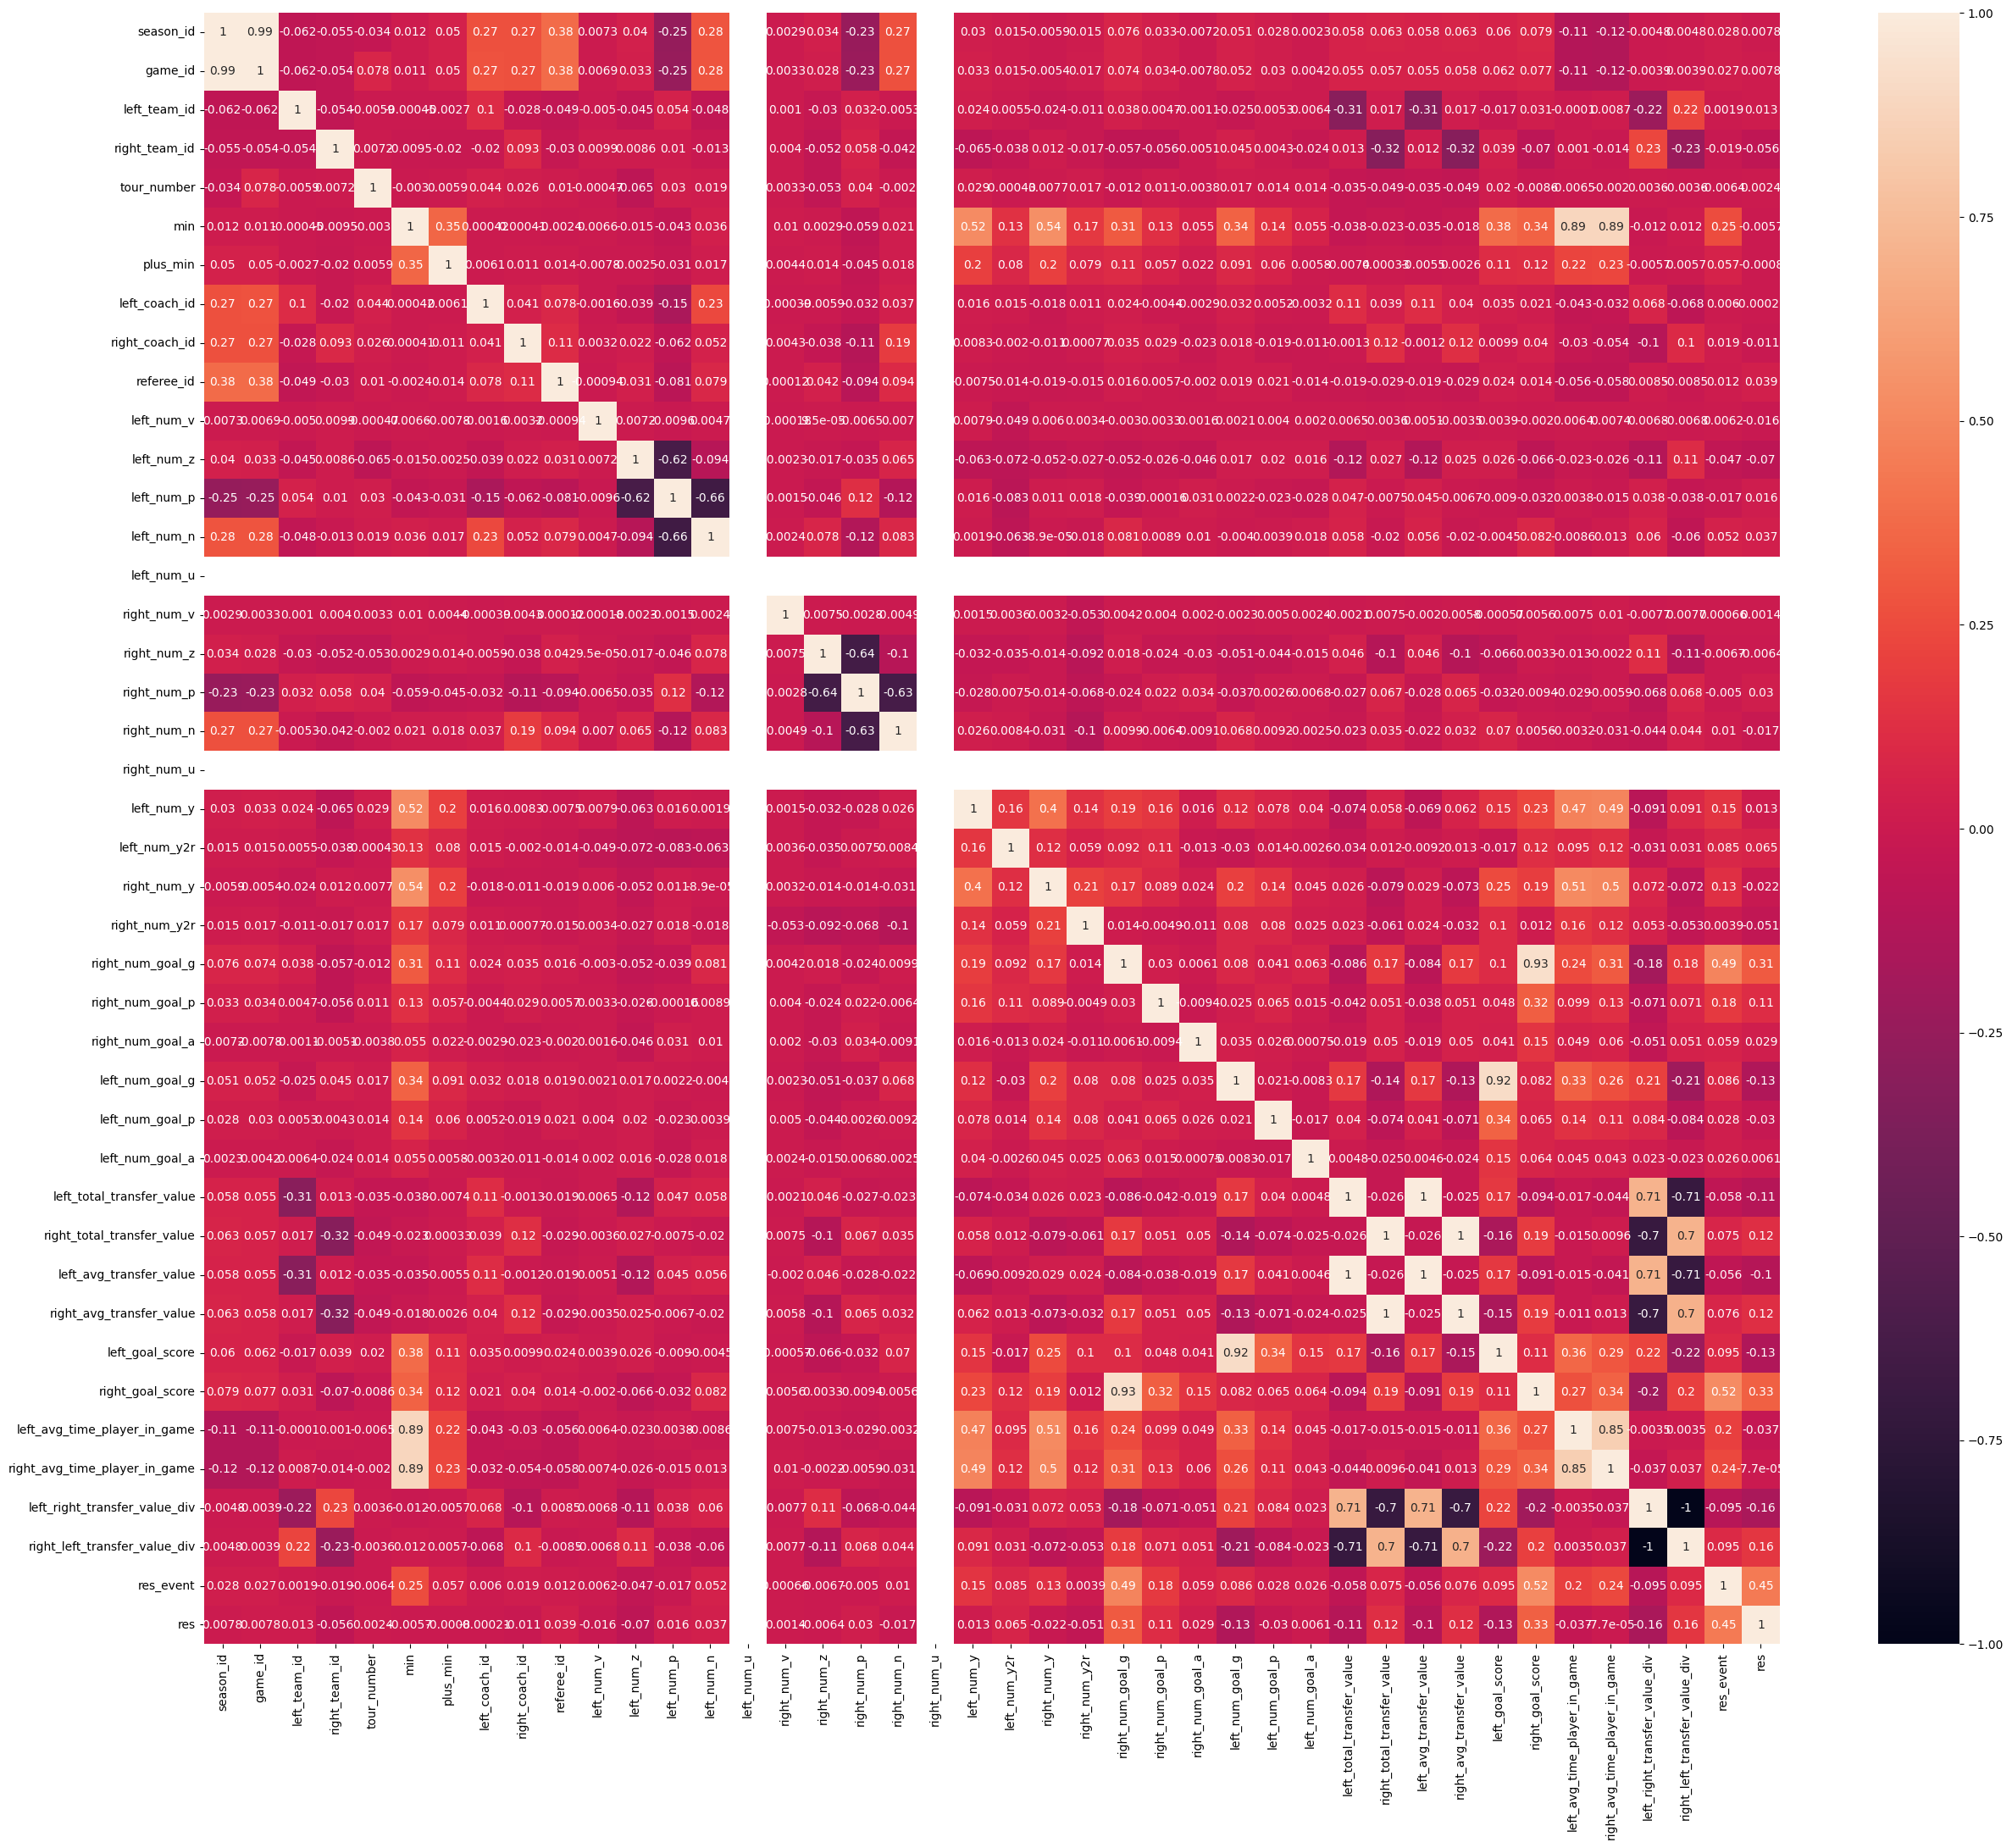

In [27]:
import seaborn as sns

plt.rcParams["figure.figsize"] = 30, 25  # ширина, высота

# все колонки ненормальны, поэтому используем ранговый коэффициент Спирмена
# аргумент annot функции heatmap() включает отображение значений в ячейках
sns.heatmap(sorted_df.corr(method="spearman", numeric_only=True), annot=True)

In [28]:
y_col = 'res' # целевая переменная (исход всей игры)

#### Корреляция факторных признаков к целевой переменной

In [29]:
sorted_df[:].corr(method='spearman',
                  numeric_only=True)[y_col].sort_values(ascending=False)

res                              1.000000
res_event                        0.445245
right_goal_score                 0.328417
right_num_goal_g                 0.309165
right_left_transfer_value_div    0.161585
right_total_transfer_value       0.124069
right_avg_transfer_value         0.123000
right_num_goal_p                 0.112604
left_num_y2r                     0.065190
referee_id                       0.038662
left_num_n                       0.036538
right_num_p                      0.029850
right_num_goal_a                 0.028939
left_num_p                       0.016278
left_team_id                     0.012975
left_num_y                       0.012571
game_id                          0.007826
season_id                        0.007805
left_num_goal_a                  0.006127
tour_number                      0.002384
right_num_v                      0.001389
right_avg_time_player_in_game   -0.000077
left_coach_id                   -0.000211
plus_min                        -0

#### Корреляция между фактормными признаками

In [30]:
temp_df = sorted_df
temp_df = temp_df.drop(columns=[y_col])

temp_df[:].corr(method='spearman')

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event
season_id,1.000000,0.993716,-0.062031,-0.054519,-0.033901,0.011748,0.049566,0.270361,0.270556,0.377503,0.007261,0.040478,-0.252331,0.282723,NaN,0.002911,0.034450,-0.234673,0.272660,NaN,0.030118,0.015028,-0.005883,0.015385,0.076064,0.033351,-0.007186,0.050654,0.028151,0.002313,0.057975,0.062754,0.058323,0.063427,0.059819,0.078853,-0.111757,-0.119128,-0.004758,0.004758,0.027735
game_id,0.993716,1.000000,-0.062358,-0.054146,0.077574,0.011478,0.050142,0.274479,0.272835,0.377666,0.006915,0.033078,-0.248825,0.284457,NaN,0.003317,0.028342,-0.229956,0.272172,NaN,0.032854,0.015003,-0.005385,0.017327,0.074091,0.034052,-0.007765,0.052402,0.029843,0.004167,0.054792,0.057388,0.055135,0.058091,0.062006,0.077112,-0.112061,-0.118971,-0.003933,0.003933,0.026537
left_team_id,-0.062031,-0.062358,1.000000,-0.053575,-0.005899,-0.000452,-0.002740,0.104950,-0.028152,-0.049226,-0.004997,-0.044553,0.053529,-0.047719,NaN,0.001006,-0.030483,0.031563,-0.005291,NaN,0.024396,0.005493,-0.024261,-0.010509,0.038117,0.004675,-0.001130,-0.024547,0.005294,0.006376,-0.309485,0.017392,-0.309306,0.017418,-0.017452,0.030808,-0.000100,0.008702,-0.223101,0.223101,0.001885
right_team_id,-0.054519,-0.054146,-0.053575,1.000000,0.007169,-0.009520,-0.020177,-0.019572,0.092545,-0.030415,0.009895,0.008590,0.010266,-0.013049,NaN,0.004038,-0.051528,0.058154,-0.042137,NaN,-0.064782,-0.038032,0.011676,-0.016785,-0.057208,-0.055863,-0.005054,0.044771,0.004278,-0.024046,0.013212,-0.319156,0.012109,-0.320145,0.038525,-0.070345,0.001014,-0.013800,0.227601,-0.227601,-0.018891
tour_number,-0.033901,0.077574,-0.005899,0.007169,1.000000,-0.002988,0.005884,0.043657,0.026125,0.009961,-0.000467,-0.065449,0.030483,0.018690,NaN,0.003291,-0.052804,0.039678,-0.001969,NaN,0.028791,-0.000430,0.007727,0.017184,-0.011536,0.010660,-0.003769,0.016537,0.013581,0.014107,-0.034842,-0.048878,-0.034892,-0.048587,0.019877,-0.008632,-0.006534,-0.001986,0.003570,-0.003570,-0.006412
min,0.011748,0.011478,-0.000452,-0.009520,-0.002988,1.000000,0.353696,0.000423,0.000405,-0.002386,0.006559,-0.014522,-0.043127,0.036232,NaN,0.010496,0.002915,-0.059363,0.021320,NaN,0.519725,0.133063,0.535781,0.167955,0.309496,0.126254,0.054941,0.341429,0.144426,0.055274,-0.038359,-0.022641,-0.035067,-0.017722,0.377226,0.338860,0.887583,0.888509,-0.011822,0.011822,0.250185
plus_min,0.049566,0.050142,-0.002740,-0.020177,0.005884,0.353696,1.000000,0.006062,0.011269,0.013535,-0.007810,-0.002485,-0.030680,0.017070,NaN,0.004385,0.013910,-0.044987,0.017635,NaN,0.199817,0.079592,0.199835,0.078597,0.108699,0.057323,0.021769,0.090524,0.059853,0.005776,-0.007412,0.000326,-0.005506,0.002588,0.109394,0.121996,0.222357,0.229364,-0.005676,0.005676,0.057431
left_coach_id,0.270361,0.274479,0.104950,-0.019572,0.043657,0.000423,0.006062,1.000000,0.040791,0.078293,-0.001626,-0.039449,-0.149063,0.234728,NaN,-0.000385,-0.005883,-0.032332,0.036698,NaN,0.015961,0.015258,-0.017850,0.011397,0.024170,-0.004430,-0.002920,0.032090,0.005186,-0.003237,0.111934,0.039325,0.111884,0.039766,0.034786,0.020912,-0.042974,-0.031913,0.067691,-0.067691,0.006001
right_coach_id,0.270556,0.272835,-0.028152,0.092545,0.026125,0.000405,0.011269,0.040791,1.000000,0.105388,0.003175,0.021950,-0.061964,0.052448,NaN,0.004256,-0.038154,-0.108961,0.186017,NaN,0.008321,-0.002014,-0.010579,0.000768,0.034736,0.029413,-0.022540,0.017619,-0.019290,-0.010796,-0.

(Новое) Проерка нахождения игры по номерами
- 11062 (2025-05-05)
- 11077 (2025-05-10)

In [31]:
sorted_df.loc[sorted_df['game_id'] == 11062].head(1)

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res


In [32]:
sorted_df.loc[sorted_df['game_id'] == 11077].head(1)

,season_id,game_id,left_team_id,right_team_id,tour_number,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,res


Исключим признаки:
- season_id
- game_id
- tour_number
- min
- plus_min
- left_team_id
- right_team_id

In [33]:
del_col = ['season_id', 'tour_number', 'left_team_id', 'right_team_id', 'min', 'plus_min', 'res_event', 'left_goal_score', 'right_goal_score', 'left_num_v', 'right_num_v', 'left_num_u', 'right_num_u',
           'right_num_goal_g',	'right_num_goal_p',	'right_num_goal_a',	'left_num_goal_g',	'left_num_goal_p',	'left_num_goal_a'] # 
clear_df = sorted_df.drop(columns=del_col)
clear_df.head(1)

,game_id,left_coach_id,right_coach_id,referee_id,left_num_z,left_num_p,left_num_n,right_num_z,right_num_p,right_num_n,left_num_y,left_num_y2r,right_num_y,right_num_y2r,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res
0,8927,158.0,7276.0,416.0,4,4,2,3,6,1,0,0,0,0,75000000.0,39800000.0,6.818182e+06,3.618182e+06,0.0,0.0,1.884422,0.530667,0


Изменим типы столбцов

In [34]:
clear_df['left_coach_id'] = clear_df['left_coach_id'].astype(int)
clear_df['right_coach_id'] = clear_df['right_coach_id'].astype(int)
clear_df['referee_id'] = clear_df['referee_id'].astype(int)

### Моделирование

In [35]:
from sklearn.model_selection import train_test_split

X_cols = []
for col in list(clear_df.columns):
    if col == y_col: continue
    X_cols.append(col)

# Разбиение набора данных на обучающую и тестовую выборки 8 к 2
X_train, X_test, y_train, y_test = train_test_split(
    clear_df[X_cols], clear_df[[y_col]], test_size=0.2, random_state=340
)
X_train = X_train.drop(columns=['game_id', 'left_coach_id', 'right_coach_id', 'referee_id'])
X_test = X_test.drop(columns=['game_id', 'left_coach_id', 'right_coach_id', 'referee_id'])

In [36]:
X_train.head(1)

,left_num_z,left_num_p,left_num_n,right_num_z,right_num_p,right_num_n,left_num_y,left_num_y2r,right_num_y,right_num_y2r,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div
22976,5,3,2,4,4,2,2,0,1,0,13200000.0,85500000.0,1200000.0,7.772727e+06,61.454545,50.818182,0.154386,6.477273


In [ ]:
# keep = clear_df['game_id'].drop_duplicates().sample(frac=0.8, random_state=230)
# mask = clear_df['game_id'].isin(keep)

# train = clear_df[mask]
# test = clear_df[~mask]

# y_train = train[[y_col]]
# y_test = test[[y_col]]
# X_train = train.drop(columns=[y_col, 'game_id'])
# X_test = test.drop(columns=[y_col, 'game_id'])

In [37]:
y_train.head(1)

,res
22976,2


In [38]:
print(y_train.value_counts() / len(y_train))

res
1      0.446619
2      0.308037
0      0.245344
Name: count, dtype: float64


In [39]:
print(y_test.value_counts() / len(y_test))

res
1      0.450913
2      0.301211
0      0.247876
Name: count, dtype: float64


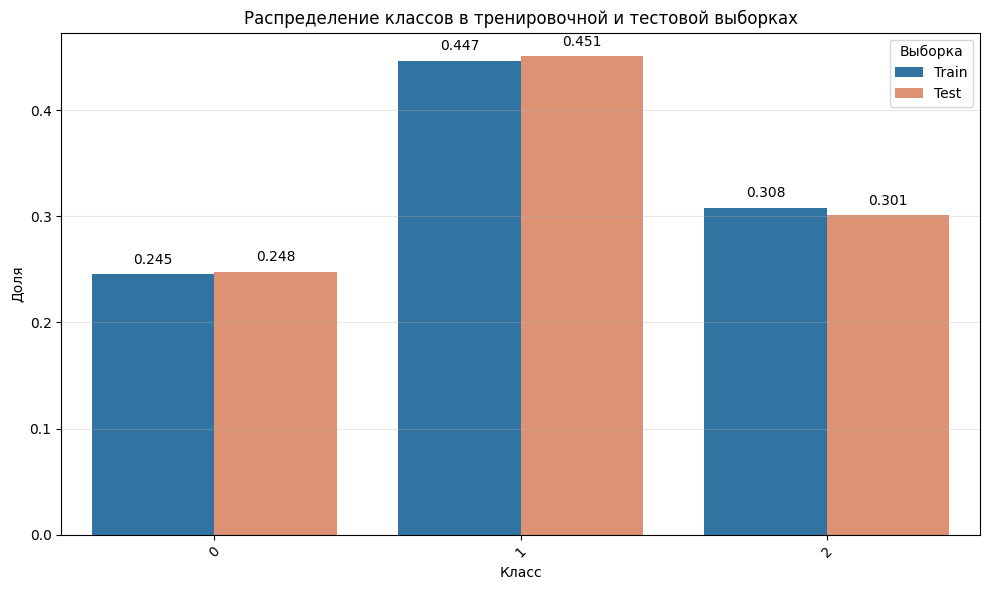

In [40]:
# Получаем распределение классов
train_dist = y_train.value_counts(normalize=True).sort_index()
test_dist = y_test.value_counts(normalize=True).sort_index()

# Создаем DataFrame для визуализации
df_dist = pd.DataFrame({
    'Train': train_dist,
    'Test': test_dist
}).reset_index()
df_dist.columns = ['Class', 'Train', 'Test']

# Преобразуем в "длинный" формат для Seaborn
df_melted = df_dist.melt(id_vars='Class', var_name='Dataset', value_name='Proportion')

# Настраиваем график
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Class',
    y='Proportion',
    hue='Dataset',
    data=df_melted,
    palette={'Train': '#1f77b4', 'Test': '#ef8a62'}
)

plt.title('Распределение классов в тренировочной и тестовой выборках')
plt.xlabel('Класс')
plt.ylabel('Доля')
plt.legend(title='Выборка')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Добавляем подписи значений
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0: continue
    plt.gca().text(
        p.get_x() + p.get_width()/2.,
        height + 0.01,
        f'{height:.3f}',
        ha='center'
    )

plt.tight_layout()
plt.show()

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22124 entries, 22976 to 8836
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   left_num_z                     22124 non-null  int64  
 1   left_num_p                     22124 non-null  int64  
 2   left_num_n                     22124 non-null  int64  
 3   right_num_z                    22124 non-null  int64  
 4   right_num_p                    22124 non-null  int64  
 5   right_num_n                    22124 non-null  int64  
 6   left_num_y                     22124 non-null  int64  
 7   left_num_y2r                   22124 non-null  int64  
 8   right_num_y                    22124 non-null  int64  
 9   right_num_y2r                  22124 non-null  int64  
 10  left_total_transfer_value      22124 non-null  float64
 11  right_total_transfer_value     22124 non-null  float64
 12  left_avg_transfer_value        22124 non-null  f

**Обучение CatBoost**

In [44]:
from catboost import CatBoostClassifier
import sklearn.metrics as metrics

Проверил обучение добавив категориальные столбецы в cat_features и убрал left_coach_id, right_coach_id и referee_id (удалить)

In [ ]:
# new_x_train = X_train.drop(columns=['left_coach_id', 'right_coach_id', 'referee_id'])
# new_x_test = X_test.drop(columns=['left_coach_id', 'right_coach_id', 'referee_id'])

# model_CBC = CatBoostClassifier(
#     cat_features=[30],
#     iterations=1500,
#     # early_stopping_rounds=50,
#     depth=9,
#     loss_function='MultiClass',
#     eval_metric='TotalF1',
#     use_best_model=True,
#     random_seed=69,
    
#     bagging_temperature=1,
#     random_strength=1,
#     learning_rate=0.01,
#     l2_leaf_reg=3,
#     leaf_estimation_method='Newton',
#     max_ctr_complexity=15,
# )

# model_CBC.fit(
#     new_x_train, y_train,
#     eval_set=(new_x_test, y_test),
#     verbose=False,
#     plot=True,
# )

In [45]:
model_CBC = CatBoostClassifier(
    # cat_features=[0, 1, 2],
    iterations=1500,
    early_stopping_rounds=50,
    depth=10,
    loss_function='MultiClass',
    eval_metric='TotalF1',
    use_best_model=True,
    random_seed=69,
    
)

model_CBC.fit(
    X_train, y_train,
    eval_set=(X_test, y_test),
    verbose=False,
    plot=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
y_pred_CBC = model_CBC.predict(X_test)

In [51]:
print("F-мера (weighted) =", metrics.f1_score(y_test, y_pred_CBC, average='weighted'))
print("Accuracy =", metrics.accuracy_score(y_test, y_pred_CBC))
print("Precision (weighted) =", metrics.precision_score(y_test, y_pred_CBC, average='weighted'))
print("Recall (weighted) =", metrics.recall_score(y_test, y_pred_CBC, average='weighted'))


eval_dict = {
   "Метрика":['F-мера (weighted)', 'Accuracy', 'Precision (weighted)', 'Recall (weighted)'],
   "Значение":[
      metrics.f1_score(y_test, y_pred_CBC, average='weighted'),
      metrics.accuracy_score(y_test, y_pred_CBC),
      metrics.precision_score(y_test, y_pred_CBC, average='weighted'),
      metrics.recall_score(y_test, y_pred_CBC, average='weighted')
   ]
}
eval_df = pd.DataFrame(eval_dict)
eval_df

F-мера (weighted) = 0.922649459223694
Accuracy = 0.9231603688302296
Precision (weighted) = 0.9236050453491313
Recall (weighted) = 0.9231603688302296


,Метрика,Значение
0,F-мера (weighted),0.922649
1,Accuracy,0.923160
2,Precision (weighted),0.923605
3,Recall (weighted),0.923160


**Обучение других моделей ML**

In [43]:
from sklearn.neighbors import KNeighborsClassifier  # kNN
from sklearn.linear_model import LogisticRegression  # логистическая регрессия
from sklearn.naive_bayes import GaussianNB  # наивный Байес
from sklearn.svm import LinearSVC  # машины опорных векторов
from sklearn.tree import DecisionTreeClassifier  # дерево решений
from xgboost import XGBClassifier # XGBClassifier Model
from sklearn.ensemble import GradientBoostingClassifier # GradientBoostingClassifier Model

In [46]:
# обучим kNN, значение k возьмем предлагаемое алгоритмом по умолчанию
model_kNN = KNeighborsClassifier().fit(X=X_train, y=y_train)
# логистическая регрессия
model_logit = LogisticRegression().fit(X=X_train, y=y_train)
# наивный Байес
model_bayes = GaussianNB().fit(X=X_train, y=y_train)
# машины опорных векторов
model_SVC = LinearSVC().fit(X=X_train, y=y_train)
# дерево решений
model_tree = DecisionTreeClassifier().fit(X=X_train, y=y_train)
# XGBClassifier Model
model_xgb = XGBClassifier().fit(X=X_train, y=y_train)
# GradientBoostingClassifier Model
model_GBC = GradientBoostingClassifier().fit(X=X_train, y=y_train)

c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\backend\venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\backend\venv\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\vlaxd\OneDrive\Рабочий стол\4_course\вкр_2024_2025\degree-work-2024-2025\backend\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in

In [47]:
# предскажем метки классов на тестовой выборке, используя обученные модели
y_pred_kNN = model_kNN.predict(X_test)
y_pred_logit = model_logit.predict(X_test)
y_pred_bayes = model_bayes.predict(X_test)
y_pred_SVC = model_SVC.predict(X_test)
y_pred_tree = model_tree.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_GBC = model_GBC.predict(X_test)

Сводная таблица метрик качества

In [57]:
overview_eval_dict = {
    "Модель":['CatBoostClassifier', 
              'KNeighborsClassifier', 
              'LogisticRegression',
              'GaussianNB',
              'LinearSVC',
              'DecisionTreeClassifier',
              'XGBClassifier',
              'GradientBoostingClassifier'
              ],
    "Accuracy":[metrics.accuracy_score(y_test, y_pred_CBC),
                metrics.accuracy_score(y_test, y_pred_kNN),
                metrics.accuracy_score(y_test, y_pred_logit),
                metrics.accuracy_score(y_test, y_pred_bayes),
                metrics.accuracy_score(y_test, y_pred_SVC),
                metrics.accuracy_score(y_test, y_pred_tree),
                metrics.accuracy_score(y_test, y_pred_xgb),
                metrics.accuracy_score(y_test, y_pred_GBC),
                ],
    "Precision (weighted)":[metrics.precision_score(y_test, y_pred_CBC, average='weighted'),
                            metrics.precision_score(y_test, y_pred_kNN, average='weighted'),
                            metrics.precision_score(y_test, y_pred_logit, average='weighted'),
                            metrics.precision_score(y_test, y_pred_bayes, average='weighted'),
                            metrics.precision_score(y_test, y_pred_SVC, average='weighted'),
                            metrics.precision_score(y_test, y_pred_tree, average='weighted'),
                            metrics.precision_score(y_test, y_pred_xgb, average='weighted'),
                            metrics.precision_score(y_test, y_pred_GBC, average='weighted'),
                            ],
    "Recall (weighted)":[metrics.recall_score(y_test, y_pred_CBC, average='weighted'),
                         metrics.recall_score(y_test, y_pred_kNN, average='weighted'),
                         metrics.recall_score(y_test, y_pred_logit, average='weighted'),
                         metrics.recall_score(y_test, y_pred_bayes, average='weighted'),
                         metrics.recall_score(y_test, y_pred_SVC, average='weighted'),
                         metrics.recall_score(y_test, y_pred_tree, average='weighted'),
                         metrics.recall_score(y_test, y_pred_xgb, average='weighted'),
                         metrics.recall_score(y_test, y_pred_GBC, average='weighted'),],
    "F-мера (weighted)":[metrics.f1_score(y_test, y_pred_CBC, average='weighted'),
                         metrics.f1_score(y_test, y_pred_kNN, average='weighted'),
                         metrics.f1_score(y_test, y_pred_logit, average='weighted'),
                         metrics.f1_score(y_test, y_pred_bayes, average='weighted'),
                         metrics.f1_score(y_test, y_pred_SVC, average='weighted'),
                         metrics.f1_score(y_test, y_pred_tree, average='weighted'),
                         metrics.f1_score(y_test, y_pred_xgb, average='weighted'),
                         metrics.f1_score(y_test, y_pred_GBC, average='weighted'),],
}
overview_eval_dict = pd.DataFrame(overview_eval_dict)
overview_eval_dict

,Модель,Accuracy,Precision (weighted),Recall (weighted),F-мера (weighted)
0,CatBoostClassifier,0.923160,0.923605,0.923160,0.922649
1,KNeighborsClassifier,0.721931,0.720049,0.721931,0.720287
2,LogisticRegression,0.542578,0.448963,0.542578,0.466265
3,GaussianNB,0.520521,0.436371,0.520521,0.448545
4,LinearSVC,0.544025,0.407715,0.544025,0.465915
5,DecisionTreeClassifier,0.864943,0.864747,0.864943,0.864829
6,XGBClassifier,0.800940,0.807280,0.800940,0.794469
7,GradientBoostingClassifier,0.596637,0.607104,0.596637,0.546833


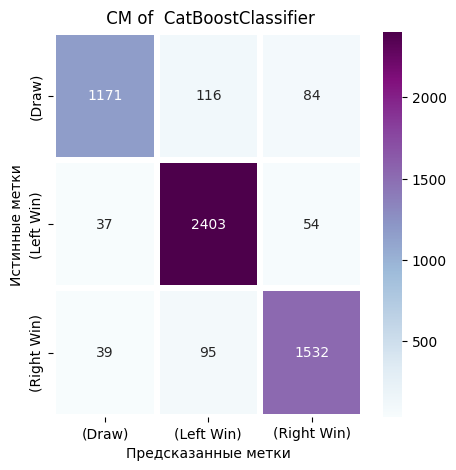

In [58]:
models_predictions=[y_pred_CBC]
model={1:'CatBoostClassifier',}


plt.figure(figsize=(5,5))
for i, y_pred in enumerate(models_predictions, 1) :

    cm = metrics.confusion_matrix(y_test, y_pred)

    plt.subplot(1,1,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(Draw)','(Left Win)','(Right Win)'],
                yticklabels=['(Draw)','(Left Win)','(Right Win)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

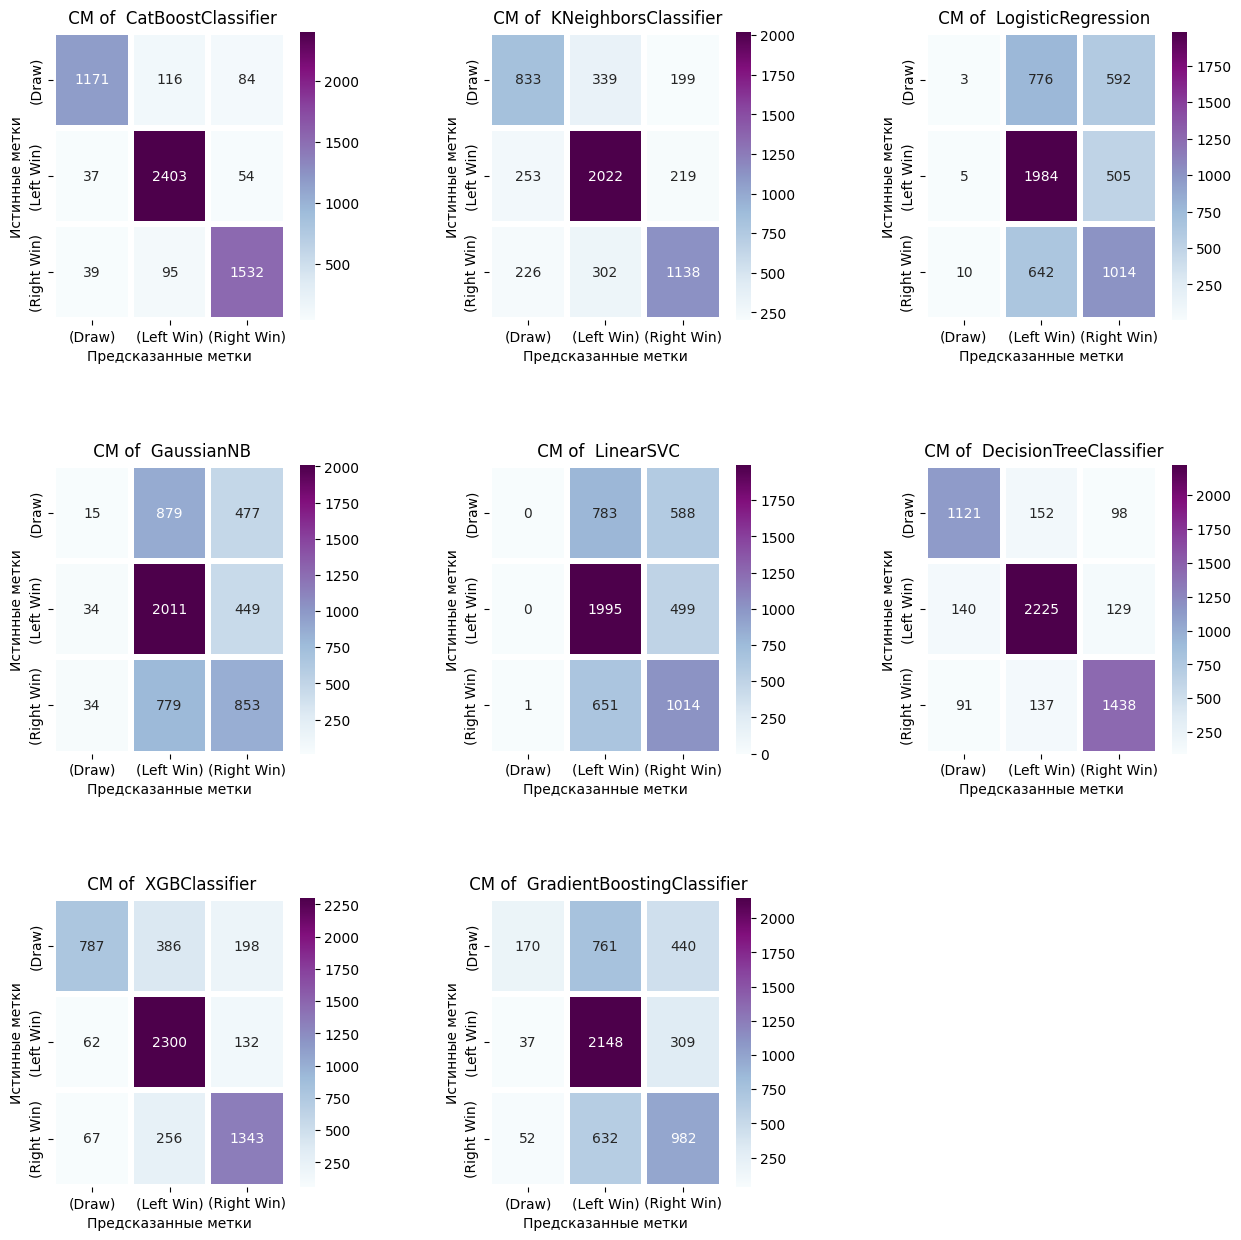

In [64]:
models_predictions=[
       y_pred_CBC, 
       y_pred_kNN,
       y_pred_logit,
       y_pred_bayes,
       y_pred_SVC,
       y_pred_tree,
       y_pred_xgb,
       y_pred_GBC,
       ]

model={1:'CatBoostClassifier', 
       2:'KNeighborsClassifier',
       3:'LogisticRegression',
       4:'GaussianNB',
       5:'LinearSVC',
       6:'DecisionTreeClassifier',
       7:'XGBClassifier',
       8:'GradientBoostingClassifier'}


plt.figure(figsize=(15,15))
for i, y_pred in enumerate(models_predictions, 1) :

    cm = metrics.confusion_matrix(y_test, y_pred)

    plt.subplot(3,3,i)
    sns.heatmap(cm,cmap='BuPu',linewidth=3,fmt='',annot=True,
                xticklabels=['(Draw)','(Left Win)','(Right Win)'],
                yticklabels=['(Draw)','(Left Win)','(Right Win)'])


    plt.title(' CM of  '+ model[i])
    plt.xlabel('Предсказанные метки')
    plt.ylabel('Истинные метки')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [179]:
import matplotlib.patches as mpatches

Диаграмма рассеяния на тестовой выборке (left_total_transfer_value, right_total_transfer_value)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_18000\634487624.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]


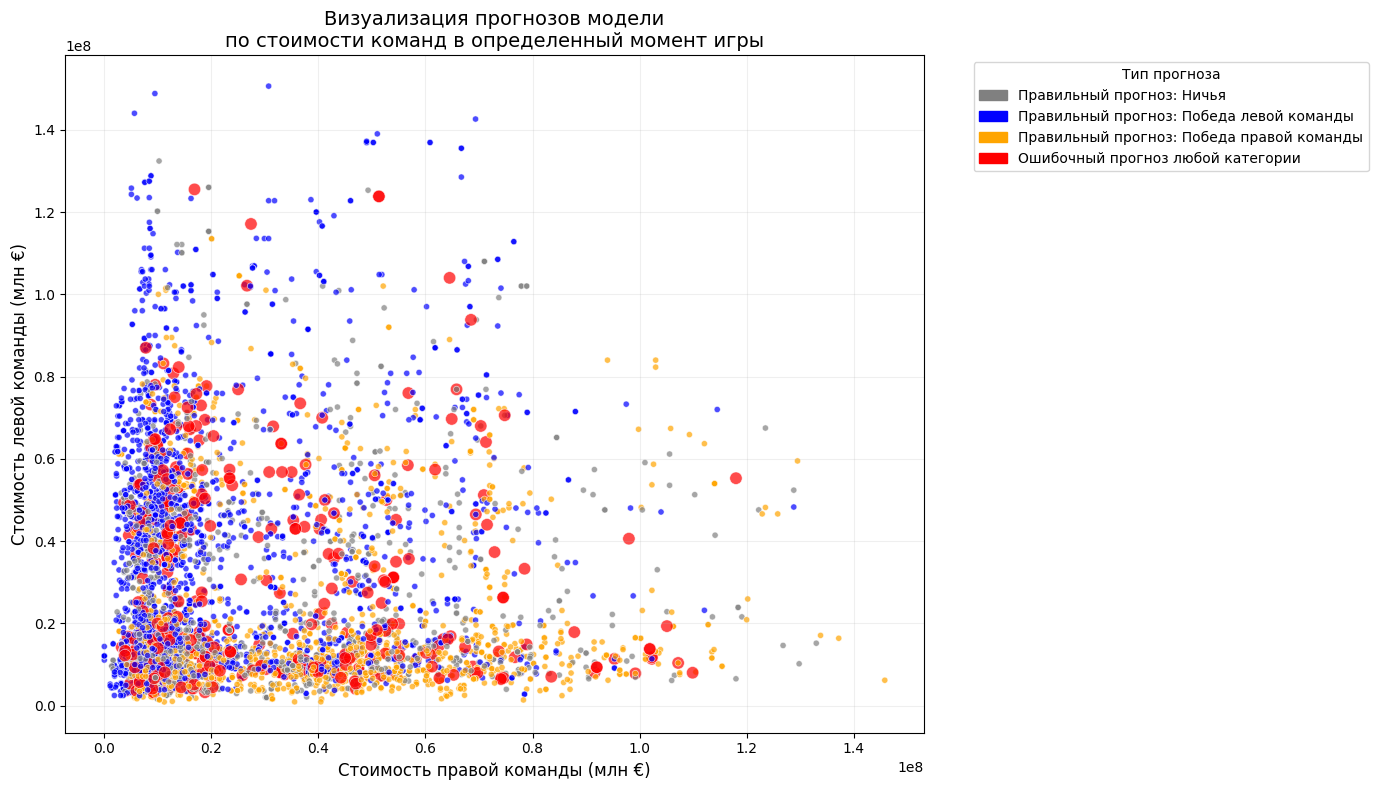

In [199]:
true_pred = np.array([y_test.iloc[i][y_col] == y_pred_CBC[i] for i in range(len(y_pred_CBC))])
false_pred = ~true_pred
colors = ['gray', 'blue', 'orange']
marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]

x, y = 'right_total_transfer_value', 'left_total_transfer_value'

# Параметры визуализации
MARKER_SIZE_CORRECT = 20  # Размер для правильных прогнозов
MARKER_SIZE_WRONG = 80   # Размер для ошибочных прогнозов

# Создаем массив размеров маркеров
marker_sizes = [MARKER_SIZE_CORRECT if tp else MARKER_SIZE_WRONG for tp in true_pred]

plt.figure(figsize=(14, 8))

# Рисуем точки с разными цветами и размерами
scatter = plt.scatter(
    x=X_test[x],
    y=X_test[y],
    c=marker_colors,
    s=marker_sizes,
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

# Создаем кастомные элементы для легенды
legend_elements = [
    mpatches.Patch(color='gray', label='Правильный прогноз: Ничья'),
    mpatches.Patch(color='blue', label='Правильный прогноз: Победа левой команды'),
    mpatches.Patch(color='orange', label='Правильный прогноз: Победа правой команды'),
    mpatches.Patch(color='red', label='Ошибочный прогноз любой категории')
]

plt.legend(
    handles=legend_elements,
    title="Тип прогноза",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xlabel("Стоимость правой команды (млн €)", fontsize=12)
plt.ylabel("Стоимость левой команды (млн €)", fontsize=12)
plt.title("Визуализация прогнозов модели\nпо стоимости команд в определенный момент игры", fontsize=14)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

Диаграмма рассеяния на тестовой выборке (left_avg_time_player_in_game, right_avg_time_player_in_game)

C:\Users\vlaxd\AppData\Local\Temp\ipykernel_18000\1895449546.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]


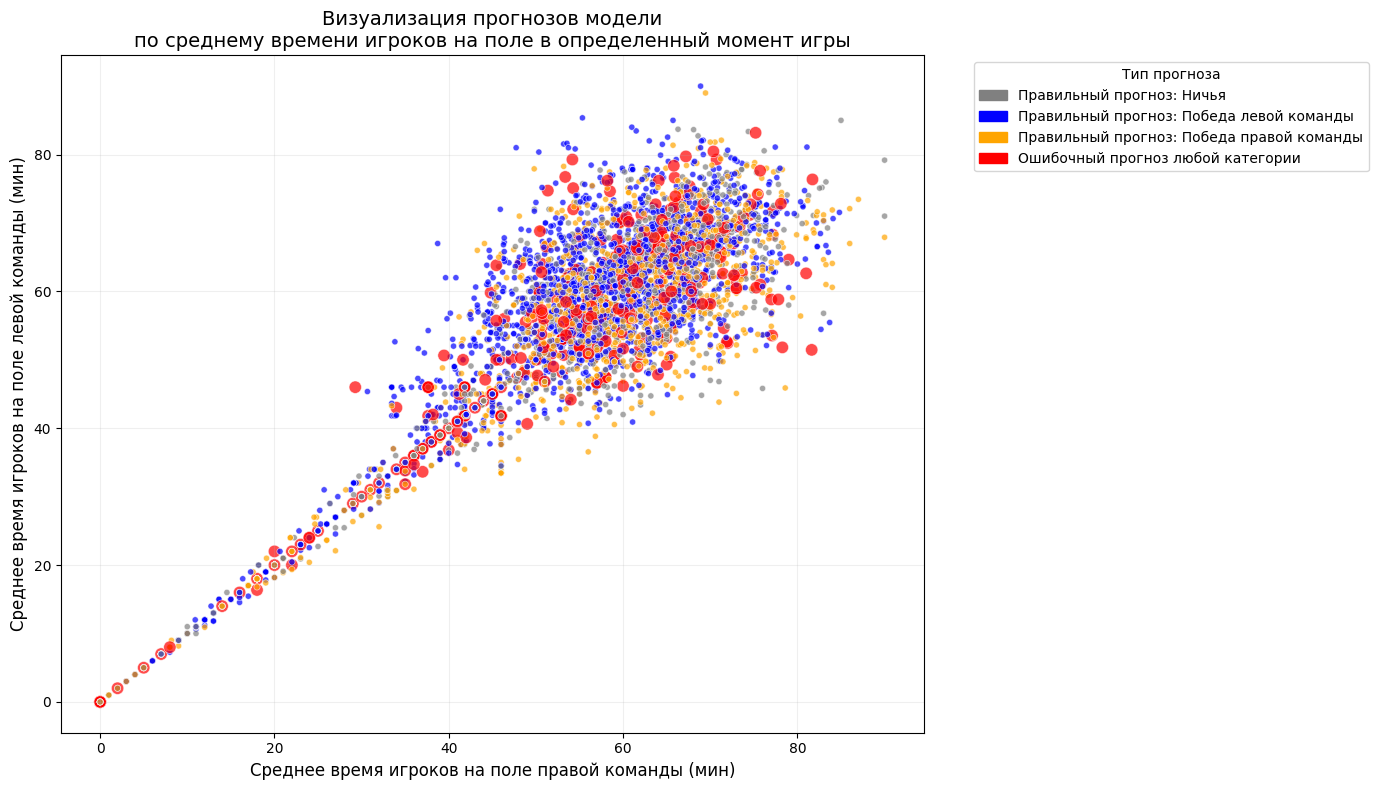

In [200]:
true_pred = np.array([y_test.iloc[i][y_col] == y_pred_CBC[i] for i in range(len(y_pred_CBC))])
false_pred = ~true_pred
colors = ['gray', 'blue', 'orange']
marker_colors = [colors[int(y_pred_CBC[i])] if true_pred[i] else 'red' for i in range(len(y_pred_CBC))]

x, y = 'right_avg_time_player_in_game', 'left_avg_time_player_in_game'

# Параметры визуализации
MARKER_SIZE_CORRECT = 20  # Размер для правильных прогнозов
MARKER_SIZE_WRONG = 80   # Размер для ошибочных прогнозов

# Создаем массив размеров маркеров
marker_sizes = [MARKER_SIZE_CORRECT if tp else MARKER_SIZE_WRONG for tp in true_pred]

plt.figure(figsize=(14, 8))

# Рисуем точки с разными цветами и размерами
scatter = plt.scatter(
    x=X_test[x],
    y=X_test[y],
    c=marker_colors,
    s=marker_sizes,
    alpha=0.7,
    edgecolors='w',
    linewidths=0.5
)

# Создаем кастомные элементы для легенды
legend_elements = [
    mpatches.Patch(color='gray', label='Правильный прогноз: Ничья'),
    mpatches.Patch(color='blue', label='Правильный прогноз: Победа левой команды'),
    mpatches.Patch(color='orange', label='Правильный прогноз: Победа правой команды'),
    mpatches.Patch(color='red', label='Ошибочный прогноз любой категории')
]

plt.legend(
    handles=legend_elements,
    title="Тип прогноза",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.xlabel("Среднее время игроков на поле правой команды (мин)", fontsize=12)
plt.ylabel("Среднее время игроков на поле левой команды (мин)", fontsize=12)
plt.title("Визуализация прогнозов модели\nпо среднему времени игроков на поле в определенный момент игры", fontsize=14)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

In [182]:
# Функция для добавления случайного шума
def jitter(arr, scale=0.15):
    return arr + np.random.normal(0, scale, len(arr))

x, y = 'right_goal_score', 'left_goal_score'

# Разделение данных на классы
correct_mask = true_pred
wrong_mask = ~true_pred

plt.figure(figsize=(14, 10))

# 1. Правильные прогнозы (нижний слой)
for result, color in zip([0, 1, 2], ['gray', 'blue', 'orange']):
    mask = (y_pred_CBC == result) & correct_mask
    plt.scatter(
        x=jitter(X_test.loc[mask, x]),
        y=jitter(X_test.loc[mask, y]),
        c=color,
        s=60,
        alpha=0.5,
        edgecolors='w',
        linewidths=0.5,
        label=f'Правильный прогноз: {["Ничья", "Победа левой команды", "Победа правой команды"][result]}',
        zorder=1
    )

# 2. Ошибочные прогнозы (верхний слой)
plt.scatter(
    x=jitter(X_test.loc[wrong_mask, x]),
    y=jitter(X_test.loc[wrong_mask, y]),
    c='red',
    s=120,
    alpha=0.9,
    edgecolors='w',
    linewidths=1,
    label='Ошибочный прогноз любой категории',
    zorder=2
)

# 3. Аннотации для частых счетов
score_counts = X_test.groupby([x, y]).size().reset_index(name='count')
for _, row in score_counts[score_counts['count'] > 1].iterrows():
    plt.text(
        row[x] + 0.1,
        row[y] + 0.1,
        f"{row['count']}",
        fontsize=10,
        color='black',
        ha='left',
        va='center',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'),
        zorder=3
    )

plt.xlabel("Счет правой команды", fontsize=12)
plt.ylabel("Счет левой команды", fontsize=12)
plt.title("Визулаизация прогнозов модели\nпо счету правой и левой команд в определенный момент игры", fontsize=14)
plt.xticks(np.arange(0, X_test[x].max()+1))
plt.yticks(np.arange(0, X_test[y].max()+1))

# Улучшенная легенда
handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2, 3]  # Порядок элементов в легенде
plt.legend(
    [handles[idx] for idx in order],
    [labels[idx] for idx in order],
    title="Тип прогноза",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.grid(alpha=0.2, linestyle='--')
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()

KeyError: 'right_goal_score'

<Figure size 1400x1000 with 0 Axes>

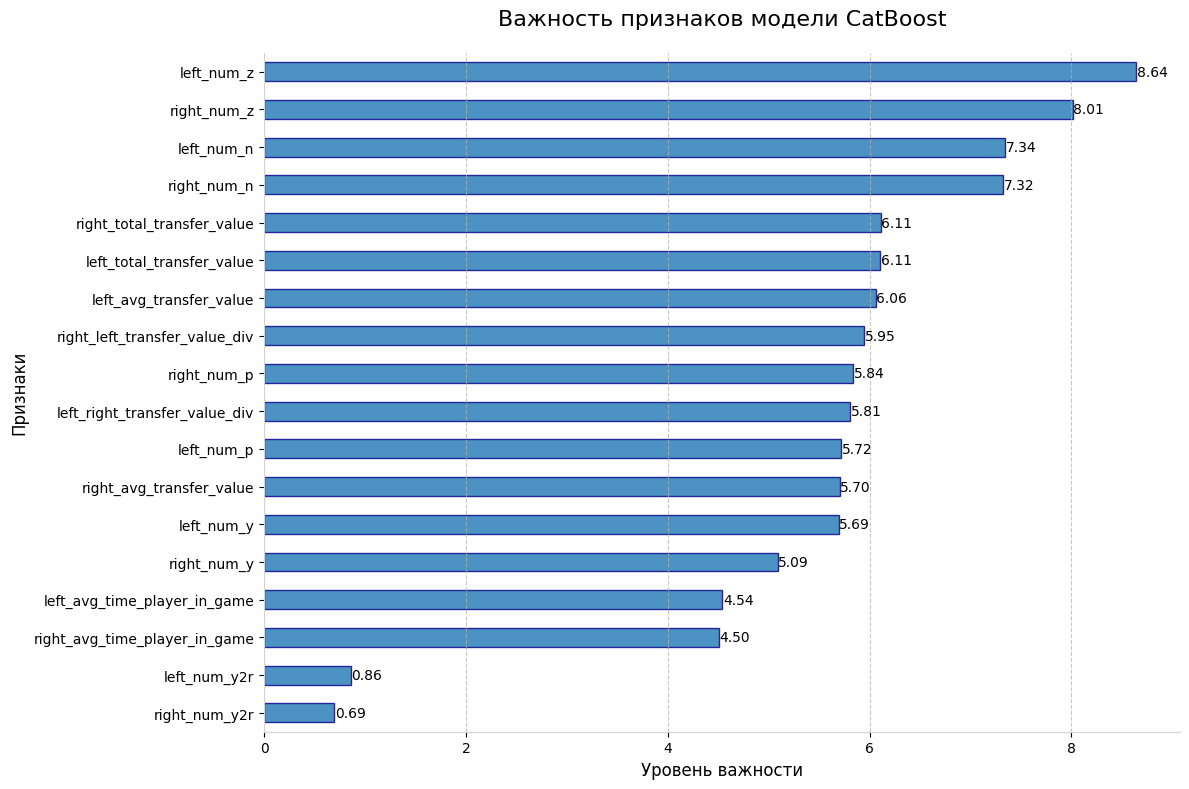

In [223]:
import matplotlib.pyplot as plt

feature_results = pd.DataFrame({'feature':X_train.columns,
                                'importance':model_CBC.get_feature_importance()})
feature_results = feature_results.sort_values('importance',ascending=True).reset_index(drop=True)

# Создаем фигуру и оси явно
fig, ax = plt.subplots(figsize=(12, 8))  # <- Размер задается здесь (ширина, высота в дюймах)

# Строим график на созданных осях
feature_results.plot(
    x='feature', 
    y='importance',
    kind='barh',
    color='#1f77b4',
    edgecolor='darkblue',
    alpha=0.8,
    legend=False,
    ax=ax  # Явно указываем оси для отрисовки
)

# Настройки оформления
ax.set_title('Важность признаков модели CatBoost', fontsize=16, pad=20)
ax.set_xlabel('Уровень важности', fontsize=12)
ax.set_ylabel('Признаки', fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Добавляем значения важности
for i, (importance, feature) in enumerate(zip(feature_results['importance'], feature_results['feature'])):
    ax.text(importance + 0.005, i, f'{importance:.2f}', 
            va='center', 
            fontsize=10,
            color='black')

# Убираем границы
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('#d3d3d3')

# Настройки шрифтов
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()


In [ ]:
# model_CBC.save_model('model_cbc_without_goals') # сохранение модели

In [ ]:
# model_CBC = CatBoostClassifier().load_model('model_cbc') # пример загрузки модели

#### График из данных БД

In [209]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

def render_graph_pred(game: pd.DataFrame, left_team_name: str, right_team_name: str):
    fig = px.line(
        game,
        x='min_plus_min', 
        y=['draw_p', 'left_p', 'right_p'],
        labels={
            'min': 'Минута матча',
            'value': 'Вероятность',
            'variable': 'Команда'
        },
        title=f'{left_team_name}:{right_team_name} (динамика вероятностей по ходу матча)',
        color_discrete_map={
            'draw_p': 'gray',
            'left_p': 'blue',
            'right_p': 'orange'
        }
    )

    # Update the legend labels
    fig.for_each_trace(lambda t: t.update(name='Ничья') if t.name == 'draw_p' else ())
    fig.for_each_trace(lambda t: t.update(name='Победа левой команды') if t.name == 'left_p' else ())
    fig.for_each_trace(lambda t: t.update(name='Победа правой команды') if t.name == 'right_p' else ())

    fig.update_traces(
        hovertemplate='<b>Основное время</b>: %{customdata[0]}<br>' +
                    '<b>Добавочное время</b>: %{customdata[1]}<br>' +
                    '<b>Счет: %{customdata[2]}:%{customdata[3]}</b><br>'
                    '<b>Вероятность</b>: %{y}<extra></extra>',
        customdata=game[['min', 'plus_min', 'left_goal_score', 'right_goal_score']]
    )

    # Настраиваем отображение
    fig.update_layout(
        hovermode='x unified', # Показывать значения всех линий при наведении
        legend_title='Легенда',
        plot_bgcolor='white'
    )

    # Добавляем подписи осей
    fig.update_xaxes(title_text='Минута матча (основное * 100 + добавочное)', showgrid=True)
    fig.update_yaxes(title_text='Вероятность', range=[0, 1]) # Ограничиваем шкалу 0-1

    # Показываем график
    fig.show()

In [210]:
from db.database import sync_session_factory
from db.queries.core import SyncCore as SC

def get_data_from_tables(table_names: list[str]) -> dict[str, pd.DataFrame]:
    res = {}
    for table_name in table_names:
        query = f"select * from {table_name}"
        with sync_session_factory() as session:
            df = pd.read_sql(query, session.connection())
        res[table_name] = df
    return res

TABLE_NAMES = SC.get_table_names() # Получаем название всех таблиц базы данных

dict_df = get_data_from_tables(TABLE_NAMES) # Формируем набор данных из таблиц базы данных

In [211]:
check_pred_df = dict_df['prediction_draw_left_right']
check_pred_df.head(1)

,prediction_id,game_id,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,created_at,updated_at,draw_p,left_p,right_p,res_p,res
0,1425,11062,59,0,812,19399,1207,1,6,2,2,0,1,4,3,2,0,1,0,1,1,2,0,0,0,0,1,15350000.0,49100000.0,1.395455e+06,4910000.0,1,2,59.0,54.4,0.312627,3.198697,2,2025-05-14 18:22:36.047397,2025-05-14 18:26:21.849766,0.654259,0.303506,0.042235,0,2


In [212]:
check_pred_df['game_id'].unique()

array([11062, 11064, 11065, 11063, 11066, 11069, 11068, 11067, 11070])

In [220]:
game_11062 = check_pred_df.loc[check_pred_df['game_id'] == 11062]
game_11062 = game_11062.sort_values(by=['min', 'plus_min'], ignore_index=True)
game_11062['min_plus_min'] = game_11062['min'] * 100 + game_11062['plus_min'] # Столбец для учета основного и добавленного времени матча
render_graph_pred(game_11062, 'Крылья Советов 1', '3 Динамо М')
game_11062

,prediction_id,game_id,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,created_at,updated_at,draw_p,left_p,right_p,res_p,res,min_plus_min
0,1441,11062,0,0,812,19399,1207,1,6,2,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,15350000.0,56300000.0,1.395455e+06,5.118182e+06,0,0,0.000000,0.0,0.272647,3.667752,0,2025-05-14 18:22:36.140391,2025-05-14 18:26:21.849766,0.588804,0.379576,0.031620,0,2,0
1,1474,11062,1,0,812,19399,1207,1,6,2,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,15350000.0,56300000.0,1.395455e+06,5.118182e+06,0,0,1.000000,1.0,0.272647,3.667752,0,2025-05-14 18:22:36.303349,2025-05-14 18:26:21.849766,0.590159,0.379113,0.030728,0,2,100
2,1509,11062,2,0,812,19399,1207,1,6,2,2,0,1,4,4,2,0,0,0,0,0,1,0,0,0,0,0,15350000.0,56300000.0,1.395455e+06,5.118182e+06,0,1,2.000000,2.0,0.272647,3.667752,2,2025-05-14 18:22:36.473308,2025-05-14 18:26:21.849766,0.590159,0.379113,0.030728,0,2,200
3,1476,11062,3,0,812,19399,1207,1,6,2,2,0,1,4,4,2,0,0,0,0,0,1,0,0,0,0,0,15350000.0,56300000.0,1.395455e+06,5.118182e+06,0,1,3.000000,3.0,0.272647,3.667752,2,2025-05-14 18:22:36.313369,2025-05-14 18:26:21.849766,0.583055,0.386599,0.030346,0,2,300
4,1424,11062,4,0,812,19399,1207,1,6,2,2,0,1,4,4,2,0,0,0,0,0,1,0,0,0,0,0,15350000.0,56300000.0,1.395455e+06,5.118182e+06,0,1,4.000000,4.0,0.272647,3.667752,2,2025-05-14 18:22:36.029410,2025-05-14 18:26:21.849766,0.575119,0.394270,0.030612,0,2,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,1486,11062,86,0,812,19399,1207,1,5,2,3,0,1,3,4,2,0,1,0,1,1,3,0,0,0,0,1,17450000.0,38900000.0,1.586364e+06,3.890000e+06,1,3,64.909091,72.0,0.448586,2.229226,2,2025-05-14 18:22:36.350333,2025-05-14 18:26:21.849766,0.045778,0.925545,0.028677,1,2,8600
87,1433,11062,87,0,812,19399,1207,1,5,2,3,0,1,3,4,2,0,1,0,1,1,3,0,0,0,0,1,17450000.0,38900000.0,1.586364e+06,3.890000e+06,1,3,65.909091,73.0,0.448586,2.229226,2,2025-05-14 18:22:36.101395,2025-05-14 18:26:21.849766,0.039873,0.935928,0.024199,1,2,8700
88,1489,11062,88,0,812,19399,1207,1,5,2,3,0,1,3,4,2,0,1,0,1,1,3,0,0,0,0,1,17450000.0,38900000.0,1.586364e+06,3.890000e+06,1,3,66.909091,74.0,0.448586,2.229226,2,2025-05-14 18:22:36.361330,2025-05-14 18:26:21.849766,0.040008,0.930348,0.029645,1,2,8800
89,1501,11062,89,0,812,19399,1207,1,5,2,3,0,1,3,4,2,0,1,0,1,1,3,0,0,0,0,1,17450000.0,38900000.0,1.586364e+06,3.890000e+06,1,3,67.909091,75.0,0.448586,2.229226,2,2025-05-14 18:22:36.427315,2025-05-14 18:26:21.849766,0.037254,0.933735,0.029011,1,2,8900


In [219]:
game_11065 = check_pred_df.loc[check_pred_df['game_id'] == 11065]
game_11065 = game_11065.sort_values(by=['min', 'plus_min'], ignore_index=True)
game_11065['min_plus_min'] = game_11065['min'] * 100 + game_11065['plus_min'] # Столбец для учета основного и добавленного времени матча
render_graph_pred(game_11065, 'ЦСКА 1', '0 Краснодар')
game_11065

,prediction_id,game_id,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,created_at,updated_at,draw_p,left_p,right_p,res_p,res,min_plus_min
0,1624,11065,0,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0,42700000.0,66500000.0,3.881818e+06,6.045455e+06,0,0,0.000000,0.000000,0.642105,1.557377,0,2025-05-14 18:23:15.795625,2025-05-14 18:26:21.535825,0.037525,0.904980,0.057495,1,1,0
1,1658,11065,1,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0,42700000.0,66500000.0,3.881818e+06,6.045455e+06,0,0,1.000000,1.000000,0.642105,1.557377,0,2025-05-14 18:23:15.889808,2025-05-14 18:26:21.535825,0.041736,0.889076,0.069188,1,1,100
2,1693,11065,2,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0,42700000.0,66500000.0,3.881818e+06,6.045455e+06,0,0,2.000000,2.000000,0.642105,1.557377,0,2025-05-14 18:23:15.981955,2025-05-14 18:26:21.535825,0.041736,0.889076,0.069188,1,1,200
3,1660,11065,3,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0,42700000.0,66500000.0,3.881818e+06,6.045455e+06,0,0,3.000000,3.000000,0.642105,1.557377,0,2025-05-14 18:23:15.894315,2025-05-14 18:26:21.535825,0.044819,0.881878,0.073303,1,1,300
4,1607,11065,4,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,0,0,0,42700000.0,66500000.0,3.881818e+06,6.045455e+06,0,0,4.000000,4.000000,0.642105,1.557377,0,2025-05-14 18:23:15.738364,2025-05-14 18:26:21.535825,0.044663,0.875911,0.079426,1,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1616,11065,87,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,1,0,0,34500000.0,65000000.0,3.136364e+06,5.909091e+06,1,0,63.909091,59.363636,0.530769,1.884058,1,2025-05-14 18:23:15.771809,2025-05-14 18:26:21.535825,0.244658,0.663756,0.091586,1,1,8700
88,1673,11065,88,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,1,0,0,34500000.0,65000000.0,3.136364e+06,5.909091e+06,1,0,64.909091,60.363636,0.530769,1.884058,1,2025-05-14 18:23:15.928892,2025-05-14 18:26:21.535825,0.232541,0.674783,0.092676,1,1,8800
89,1684,11065,89,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,1,0,0,25550000.0,65000000.0,2.322727e+06,5.909091e+06,1,0,57.818182,61.363636,0.393077,2.544031,1,2025-05-14 18:23:15.956108,2025-05-14 18:26:21.535825,0.152705,0.580379,0.266916,1,1,8900
90,1653,11065,90,0,5681,11950,72,1,4,4,2,0,1,4,3,3,0,0,0,0,0,0,0,0,1,0,0,25550000.0,65000000.0,2.322727e+06,5.909091e+06,1,0,58.818182,62.363636,0.393077,2.544031,1,2025-05-14 18:23:15.875616,2025-05-14 18:26:21.535825,0.175909,0.574924,0.249167,1,1,9000


In [218]:
game_11066 = check_pred_df.loc[check_pred_df['game_id'] == 11066]
game_11066 = game_11066.sort_values(by=['min', 'plus_min'], ignore_index=True)
game_11066['min_plus_min'] = game_11066['min'] * 100 + game_11066['plus_min'] # Столбец для учета основного и добавленного времени матча
render_graph_pred(game_11066, 'Акрон 3', '2 Ахмат')
game_11066

,prediction_id,game_id,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,created_at,updated_at,draw_p,left_p,right_p,res_p,res,min_plus_min
0,1809,11066,0,0,1436,283,2278,1,3,3,4,0,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0,12650000.0,11650000.0,1.150000e+06,1.059091e+06,0,0,0.0,0.000000,1.085837,0.920949,0,2025-05-14 18:23:57.001997,2025-05-14 18:26:21.858765,0.571072,0.075856,0.353072,0,1,0
1,1843,11066,1,0,1436,283,2278,1,3,3,4,0,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0,12650000.0,11650000.0,1.150000e+06,1.059091e+06,0,0,1.0,1.000000,1.085837,0.920949,0,2025-05-14 18:23:57.100624,2025-05-14 18:26:21.858765,0.481726,0.054160,0.464115,0,1,100
2,1879,11066,2,0,1436,283,2278,1,3,3,4,0,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0,12650000.0,11650000.0,1.150000e+06,1.059091e+06,0,0,2.0,2.000000,1.085837,0.920949,0,2025-05-14 18:23:57.196450,2025-05-14 18:26:21.858765,0.481726,0.054160,0.464115,0,1,200
3,1845,11066,3,0,1436,283,2278,1,3,3,4,0,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0,12650000.0,11650000.0,1.150000e+06,1.059091e+06,0,0,3.0,3.000000,1.085837,0.920949,0,2025-05-14 18:23:57.106633,2025-05-14 18:26:21.858765,0.486918,0.051075,0.462006,0,1,300
4,1792,11066,4,0,1436,283,2278,1,3,3,4,0,1,4,5,1,0,0,0,0,0,0,0,0,0,0,0,12650000.0,11650000.0,1.150000e+06,1.059091e+06,0,0,4.0,4.000000,1.085837,0.920949,0,2025-05-14 18:23:56.940283,2025-05-14 18:26:21.858765,0.464367,0.048148,0.487485,2,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,1801,11066,87,0,1436,283,2278,1,4,2,4,0,1,4,4,2,0,3,0,2,0,2,0,0,3,0,0,12400000.0,11400000.0,1.127273e+06,1.036364e+06,3,2,58.0,60.727273,1.087719,0.919355,1,2025-05-14 18:23:56.977966,2025-05-14 18:26:21.858765,0.904160,0.032043,0.063797,0,1,8700
89,1858,11066,88,0,1436,283,2278,1,4,2,4,0,1,4,4,2,0,3,0,2,0,2,0,0,3,0,0,12400000.0,11400000.0,1.127273e+06,1.036364e+06,3,2,59.0,61.727273,1.087719,0.919355,1,2025-05-14 18:23:57.140548,2025-05-14 18:26:21.858765,0.918081,0.024080,0.057838,0,1,8800
90,1871,11066,89,0,1436,283,2278,1,4,2,4,0,1,4,4,2,0,3,0,2,0,2,0,0,3,0,0,12400000.0,11400000.0,1.127273e+06,1.036364e+06,3,2,60.0,62.727273,1.087719,0.919355,1,2025-05-14 18:23:57.175441,2025-05-14 18:26:21.858765,0.898737,0.019113,0.082150,0,1,8900
91,1837,11066,90,0,1436,283,2278,1,4,2,4,0,1,4,4,2,0,3,0,2,0,2,0,0,3,0,0,12400000.0,11400000.0,1.127273e+06,1.036364e+06,3,2,61.0,63.727273,1.087719,0.919355,1,2025-05-14 18:23:57.083627,2025-05-14 18:26:21.858765,0.889271,0.016010,0.094718,0,1,9000


In [217]:
game_11070 = check_pred_df.loc[check_pred_df['game_id'] == 11070]
game_11070 = game_11070.sort_values(by=['min', 'plus_min'], ignore_index=True)
game_11070['min_plus_min'] = game_11070['min'] * 100 + game_11070['plus_min'] # Столбец для учета основного и добавленного времени матча
render_graph_pred(game_11070, 'Пари Нижний Новгород 5', '2 Крылья Советов')
game_11070

,prediction_id,game_id,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,created_at,updated_at,draw_p,left_p,right_p,res_p,res,min_plus_min
0,2182,11070,0,0,1031,812,4278,1,5,4,1,0,1,6,2,2,0,0,0,0,0,0,0,0,0,0,0,9050000.0,16750000.0,822727.272727,1.522727e+06,0,0,0.0,0.000000,0.540299,1.850829,0,2025-05-14 18:25:16.754734,2025-05-14 18:26:24.473419,0.816648,0.161810,0.021542,0,1,0
1,2216,11070,1,0,1031,812,4278,1,5,4,1,0,1,6,2,2,0,0,0,0,0,0,0,0,0,0,0,9050000.0,16750000.0,822727.272727,1.522727e+06,0,0,1.0,1.000000,0.540299,1.850829,0,2025-05-14 18:25:16.916132,2025-05-14 18:26:24.473419,0.805694,0.170883,0.023423,0,1,100
2,2252,11070,2,0,1031,812,4278,1,5,4,1,0,1,6,2,2,0,0,0,0,0,0,0,0,0,0,0,9050000.0,16750000.0,822727.272727,1.522727e+06,0,0,2.0,2.000000,0.540299,1.850829,0,2025-05-14 18:25:17.068474,2025-05-14 18:26:24.473419,0.805694,0.170883,0.023423,0,1,200
3,2219,11070,3,0,1031,812,4278,1,5,4,1,0,1,6,2,2,0,0,0,0,0,0,0,0,0,0,0,9050000.0,16750000.0,822727.272727,1.522727e+06,0,0,3.0,3.000000,0.540299,1.850829,0,2025-05-14 18:25:16.927129,2025-05-14 18:26:24.473419,0.800210,0.175711,0.024079,0,1,300
4,2163,11070,4,0,1031,812,4278,1,5,4,1,0,1,6,2,2,0,0,0,0,0,0,0,0,0,0,0,9050000.0,16750000.0,822727.272727,1.522727e+06,0,0,4.0,4.000000,0.540299,1.850829,0,2025-05-14 18:25:16.678752,2025-05-14 18:26:24.473419,0.803900,0.171153,0.024947,0,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2232,11070,88,0,1031,812,4278,1,6,4,0,0,1,3,3,4,0,1,0,4,0,2,0,0,3,2,0,8700000.0,15850000.0,790909.090909,1.440909e+06,5,2,54.0,65.000000,0.548896,1.821839,1,2025-05-14 18:25:16.994028,2025-05-14 18:26:24.473419,0.140411,0.792126,0.067463,1,1,8800
91,2244,11070,89,0,1031,812,4278,1,6,4,0,0,1,3,3,4,0,1,0,4,0,2,0,0,3,2,0,8700000.0,15850000.0,790909.090909,1.440909e+06,5,2,55.0,66.000000,0.548896,1.821839,1,2025-05-14 18:25:17.046491,2025-05-14 18:26:24.473419,0.166194,0.772384,0.061422,1,1,8900
92,2211,11070,90,0,1031,812,4278,1,6,4,0,0,1,3,3,4,0,1,0,4,0,2,0,0,3,2,0,8700000.0,15850000.0,790909.090909,1.440909e+06,5,2,56.0,67.000000,0.548896,1.821839,1,2025-05-14 18:25:16.892608,2025-05-14 18:26:24.473419,0.165110,0.776390,0.058500,1,1,9000
93,2217,11070,90,2,1031,812,4278,1,6,4,0,0,1,3,4,3,0,1,0,4,0,2,0,0,3,2,0,8700000.0,12950000.0,790909.090909,1.177273e+06,5,2,56.0,58.818182,0.671815,1.488506,1,2025-05-14 18:25:16.920131,2025-05-14 18:26:24.473419,0.051136,0.940196,0.008668,1,1,9002


In [222]:

game_11068 = check_pred_df.loc[check_pred_df['game_id'] == 11068]
game_11068 = game_11068.sort_values(by=['min', 'plus_min'], ignore_index=True)
game_11068['min_plus_min'] = game_11068['min'] * 100 + game_11068['plus_min'] # Столбец для учета основного и добавленного времени матча
render_graph_pred(game_11068, 'Динамо М 2', '0 Спартак М')
game_11068

,prediction_id,game_id,min,plus_min,left_coach_id,right_coach_id,referee_id,left_num_v,left_num_z,left_num_p,left_num_n,left_num_u,right_num_v,right_num_z,right_num_p,right_num_n,right_num_u,left_num_y,left_num_y2r,right_num_y,right_num_y2r,right_num_goal_g,right_num_goal_p,right_num_goal_a,left_num_goal_g,left_num_goal_p,left_num_goal_a,left_total_transfer_value,right_total_transfer_value,left_avg_transfer_value,right_avg_transfer_value,left_goal_score,right_goal_score,left_avg_time_player_in_game,right_avg_time_player_in_game,left_right_transfer_value_div,right_left_transfer_value_div,res_event,created_at,updated_at,draw_p,left_p,right_p,res_p,res,min_plus_min
0,1995,11068,0,0,19399,17219,786,1,3,5,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,53800000.0,68500000.0,4.890909e+06,6.227273e+06,0,0,0.000000,0.000000,0.785401,1.273234,0,2025-05-14 18:24:37.269864,2025-05-14 18:26:23.710407,0.344658,0.152202,0.503141,2,1,0
1,2028,11068,1,0,19399,17219,786,1,3,5,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,53800000.0,68500000.0,4.890909e+06,6.227273e+06,0,0,1.000000,1.000000,0.785401,1.273234,0,2025-05-14 18:24:37.373742,2025-05-14 18:26:23.710407,0.307683,0.131178,0.561139,2,1,100
2,2064,11068,2,0,19399,17219,786,1,3,5,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,53800000.0,68500000.0,4.890909e+06,6.227273e+06,0,0,2.000000,2.000000,0.785401,1.273234,0,2025-05-14 18:24:37.470866,2025-05-14 18:26:23.710407,0.307683,0.131178,0.561139,2,1,200
3,2030,11068,3,0,19399,17219,786,1,3,5,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,53800000.0,68500000.0,4.890909e+06,6.227273e+06,0,0,3.000000,3.000000,0.785401,1.273234,0,2025-05-14 18:24:37.378739,2025-05-14 18:26:23.710407,0.324276,0.121763,0.553961,2,1,300
4,1978,11068,4,0,19399,17219,786,1,3,5,2,0,1,4,4,2,0,0,0,0,0,0,0,0,0,0,0,53800000.0,68500000.0,4.890909e+06,6.227273e+06,0,0,4.000000,4.000000,0.785401,1.273234,0,2025-05-14 18:24:37.191775,2025-05-14 18:26:23.710407,0.325769,0.121420,0.552811,2,1,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1987,11068,87,0,19399,17219,786,1,4,4,2,0,1,4,5,1,0,2,0,4,0,0,0,0,1,1,0,46300000.0,56200000.0,4.209091e+06,5.109091e+06,2,0,73.909091,57.090909,0.823843,1.213823,1,2025-05-14 18:24:37.241869,2025-05-14 18:26:23.710407,0.282712,0.617961,0.099327,1,1,8700
88,2043,11068,88,0,19399,17219,786,1,4,4,2,0,1,4,5,1,0,2,0,4,0,0,0,0,1,1,0,46300000.0,56200000.0,4.209091e+06,5.109091e+06,2,0,74.909091,58.090909,0.823843,1.213823,1,2025-05-14 18:24:37.413984,2025-05-14 18:26:23.710407,0.341208,0.561543,0.097249,1,1,8800
89,2055,11068,89,0,19399,17219,786,1,4,4,2,0,1,4,5,1,0,2,0,4,0,0,0,0,1,1,0,46300000.0,56200000.0,4.209091e+06,5.109091e+06,2,0,75.909091,59.090909,0.823843,1.213823,1,2025-05-14 18:24:37.445423,2025-05-14 18:26:23.710407,0.362429,0.538030,0.099541,1,1,8900
90,2021,11068,90,0,19399,17219,786,1,4,5,1,0,1,4,5,1,0,2,0,4,0,0,0,0,1,1,0,45300000.0,56200000.0,4.118182e+06,5.109091e+06,2,0,68.727273,60.090909,0.806050,1.240618,1,2025-05-14 18:24:37.351856,2025-05-14 18:26:23.710407,0.392080,0.458504,0.149416,1,1,9000


### График из данных ответа

In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

def render_graph_pred_from_request(prediction_list: list[dict]):
    prediction_df = pd.DataFrame(prediction_list)
    prediction_df['min_plus_min'] = prediction_df['min'] * 100 + prediction_df['plus_min'] # Столбец для учета основного и добавленного времени матча
    
    fig = px.line(
        prediction_df,
        x='min_plus_min', 
        y=['draw_p', 'left_p', 'right_p'],
        labels={
            'min': 'Минута матча',
            'value': 'Вероятность',
            'variable': 'Команда'
        },
        title=f'Динамика вероятностей по ходу матча',
        color_discrete_map={
            'draw_p': 'gray',
            'left_p': 'blue',
            'right_p': 'orange'
        }
    )

    # Update the legend labels
    fig.for_each_trace(lambda t: t.update(name='Ничья') if t.name == 'draw_p' else ())
    fig.for_each_trace(lambda t: t.update(name='Победа левой команды') if t.name == 'left_p' else ())
    fig.for_each_trace(lambda t: t.update(name='Победа правой команды') if t.name == 'right_p' else ())

    fig.update_traces(
        hovertemplate='<b>Основное время</b>: %{customdata[0]}<br>' +
                    '<b>Добавочное время</b>: %{customdata[1]}<br>' +
                    '<b>Счет: %{customdata[2]}:%{customdata[3]}</b><br>'
                    '<b>Вероятность</b>: %{y}<extra></extra>',
        customdata=prediction_df[['min', 'plus_min', 'left_goal_score', 'right_goal_score']]
    )

    # Настраиваем отображение
    fig.update_layout(
        hovermode='x unified', # Показывать значения всех линий при наведении
        legend_title='Легенда',
        plot_bgcolor='white'
    )

    # Добавляем подписи осей
    fig.update_xaxes(title_text='Минута матча (основное * 100 + добавочное)', showgrid=True)
    fig.update_yaxes(title_text='Вероятность', range=[0, 1]) # Ограничиваем шкалу 0-1

    # Показываем график
    fig.show()

In [6]:
prediction_list = [
    {
      "prediction_id": 2474,
      "min": 0,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 0,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 42700000,
      "right_total_transfer_value": 66500000,
      "left_avg_transfer_value": 3881818.1818181816,
      "right_avg_transfer_value": 6045454.545454546,
      "left_goal_score": 0,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 0,
      "right_avg_time_player_in_game": 0,
      "left_right_transfer_value_div": 0.6421052631578947,
      "right_left_transfer_value_div": 1.5573770491803278,
      "res_event": 0,
      "draw_p": 0.037525450867298096,
      "left_p": 0.9049799585568197,
      "right_p": 0.05749459057588235,
      "res_p": 1,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.399724",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2476,
      "min": 62,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 0,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 32200000,
      "right_total_transfer_value": 66500000,
      "left_avg_transfer_value": 2927272.727272727,
      "right_avg_transfer_value": 6045454.545454546,
      "left_goal_score": 0,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 45.09090909090909,
      "right_avg_time_player_in_game": 62,
      "left_right_transfer_value_div": 0.4842105263157895,
      "right_left_transfer_value_div": 2.0652173913043477,
      "res_event": 0,
      "draw_p": 0.12386302361152757,
      "left_p": 0.2093575808603702,
      "right_p": 0.6667793955281023,
      "res_p": 2,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.407720",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2477,
      "min": 68,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 0,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 34500000,
      "right_total_transfer_value": 66500000,
      "left_avg_transfer_value": 3136363.6363636362,
      "right_avg_transfer_value": 6045454.545454546,
      "left_goal_score": 0,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 44.90909090909091,
      "right_avg_time_player_in_game": 68,
      "left_right_transfer_value_div": 0.518796992481203,
      "right_left_transfer_value_div": 1.9275362318840579,
      "res_event": 0,
      "draw_p": 0.10099422451089418,
      "left_p": 0.19062701051356254,
      "right_p": 0.7083787649755433,
      "res_p": 2,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.410716",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2480,
      "min": 72,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 1,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 34500000,
      "right_total_transfer_value": 68300000,
      "left_avg_transfer_value": 3136363.6363636362,
      "right_avg_transfer_value": 6209090.909090909,
      "left_goal_score": 1,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 48.90909090909091,
      "right_avg_time_player_in_game": 58.90909090909091,
      "left_right_transfer_value_div": 0.5051244509516838,
      "right_left_transfer_value_div": 1.9797101449275363,
      "res_event": 1,
      "draw_p": 0.2575800528425399,
      "left_p": 0.43326674373655744,
      "right_p": 0.3091532034209027,
      "res_p": 1,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.419940",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2479,
      "min": 76,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 1,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 34500000,
      "right_total_transfer_value": 68300000,
      "left_avg_transfer_value": 3136363.6363636362,
      "right_avg_transfer_value": 6209090.909090909,
      "left_goal_score": 1,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 52.90909090909091,
      "right_avg_time_player_in_game": 56,
      "left_right_transfer_value_div": 0.5051244509516838,
      "right_left_transfer_value_div": 1.9797101449275363,
      "res_event": 1,
      "draw_p": 0.17373724656929013,
      "left_p": 0.6077732170539739,
      "right_p": 0.2184895363767359,
      "res_p": 1,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.416940",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2478,
      "min": 84,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 1,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 34500000,
      "right_total_transfer_value": 65000000,
      "left_avg_transfer_value": 3136363.6363636362,
      "right_avg_transfer_value": 5909090.909090909,
      "left_goal_score": 1,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 60.90909090909091,
      "right_avg_time_player_in_game": 56.36363636363637,
      "left_right_transfer_value_div": 0.5307692307692308,
      "right_left_transfer_value_div": 1.8840579710144927,
      "res_event": 1,
      "draw_p": 0.15875128051789536,
      "left_p": 0.7504216409747014,
      "right_p": 0.0908270785074033,
      "res_p": 1,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.414748",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2475,
      "min": 89,
      "plus_min": 0,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 0,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 1,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 25550000,
      "right_total_transfer_value": 65000000,
      "left_avg_transfer_value": 2322727.272727273,
      "right_avg_transfer_value": 5909090.909090909,
      "left_goal_score": 1,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 57.81818181818182,
      "right_avg_time_player_in_game": 61.36363636363637,
      "left_right_transfer_value_div": 0.3930769230769231,
      "right_left_transfer_value_div": 2.544031311154599,
      "res_event": 1,
      "draw_p": 0.1527045457724729,
      "left_p": 0.580379207707769,
      "right_p": 0.2669162465197581,
      "res_p": 1,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.403713",
      "updated_at": "2025-05-15T22:44:33.269555"
    },
    {
      "prediction_id": 2481,
      "min": 90,
      "plus_min": 5,
      "left_coach_id": 5681,
      "right_coach_id": 11950,
      "referee_id": 72,
      "left_num_v": 1,
      "left_num_z": 4,
      "left_num_p": 4,
      "left_num_n": 2,
      "left_num_u": 0,
      "right_num_v": 1,
      "right_num_z": 4,
      "right_num_p": 3,
      "right_num_n": 3,
      "right_num_u": 0,
      "left_num_y": 0,
      "left_num_y2r": 0,
      "right_num_y": 1,
      "right_num_y2r": 0,
      "right_num_goal_g": 0,
      "right_num_goal_p": 0,
      "right_num_goal_a": 0,
      "left_num_goal_g": 1,
      "left_num_goal_p": 0,
      "left_num_goal_a": 0,
      "left_total_transfer_value": 25550000,
      "right_total_transfer_value": 65000000,
      "left_avg_transfer_value": 2322727.272727273,
      "right_avg_transfer_value": 5909090.909090909,
      "left_goal_score": 1,
      "right_goal_score": 0,
      "left_avg_time_player_in_game": 58.81818181818182,
      "right_avg_time_player_in_game": 62.36363636363637,
      "left_right_transfer_value_div": 0.3930769230769231,
      "right_left_transfer_value_div": 2.544031311154599,
      "res_event": 1,
      "draw_p": 0.17456921321502014,
      "left_p": 0.573917342434507,
      "right_p": 0.25151344435047285,
      "res_p": 1,
      "res": 1,
      "created_at": "2025-05-15T22:42:54.424932",
      "updated_at": "2025-05-15T22:44:33.269555"
    }
  ]

In [7]:
render_graph_pred_from_request(prediction_list)